<span style="font-family: Arial; font-weight:bold;font-size:2.5em;color:#00b3e5;"> Artificial Nueral Network Project

**DOMAIN:** Electronics and Telecommunication

• **CONTEXT:** A communications equipment manufacturing company has a product which is responsible for emitting informative signals. Company wants to build a
machine learning model which can help the company to predict the equipment’s signal quality using various parameters.

• **DATA DESCRIPTION:** The data set contains information on various signal tests performed:
1. Parameters: Various measurable signal parameters.
2. Signal_Quality: Final signal strength or quality

• PROJECT OBJECTIVE: The need is to build a regressor which can use these parameters to determine the signal strength or quality [as number]

1) Import DataSet

Part- 1 - Signal.csv

In [179]:
# Import Libraries
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import os
import seaborn as sns
import plotly.graph_objs as px
import plotly.express as ex
from plotly.subplots import make_subplots
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

# Importing the Keras libraries and packages
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,ReLU,ELU
from keras.layers import Dropout,BatchNormalization,Activation
from tensorflow.keras import layers
from keras import regularizers

# Feature Scaling and metrics
from sklearn.preprocessing import StandardScaler

from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(1)

In [88]:
from google.colab import drive

In [89]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [90]:
signal_data = pd.read_csv('/content/gdrive/MyDrive/AIML/GL_Projects/Introduction_NN/Part- 1 - Signal.csv', encoding='ISO-8859-1')
print(f" Shape of data : {signal_data.shape}")
print(f" size of the data : {signal_data.size}")
signal_data.head()

 Shape of data : (1599, 12)
 size of the data : 19188


,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 2) Data Cleaning

In [91]:
signal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**There are 11 input parameters with type float and target variable with type integer**

In [92]:
signal_data.isnull().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

There are no missing values in the data set.

3.Data Analysis and Visualization

In [93]:
signal_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Parameter 1,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
Parameter 2,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
Parameter 3,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
Parameter 4,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
Parameter 5,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
Parameter 6,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
Parameter 7,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
Parameter 8,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
Parameter 9,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
Parameter 10,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


- Mean and median looks close to each other for each parameter.

- Data distribution of parameters 4, 6 and 7 looks more right skewed     
   with  some outliers. 

- Other variables looks normally distributed with very few outliers.

Lets check in detail using univariate histogram and boxplots

## Univariate Analysis

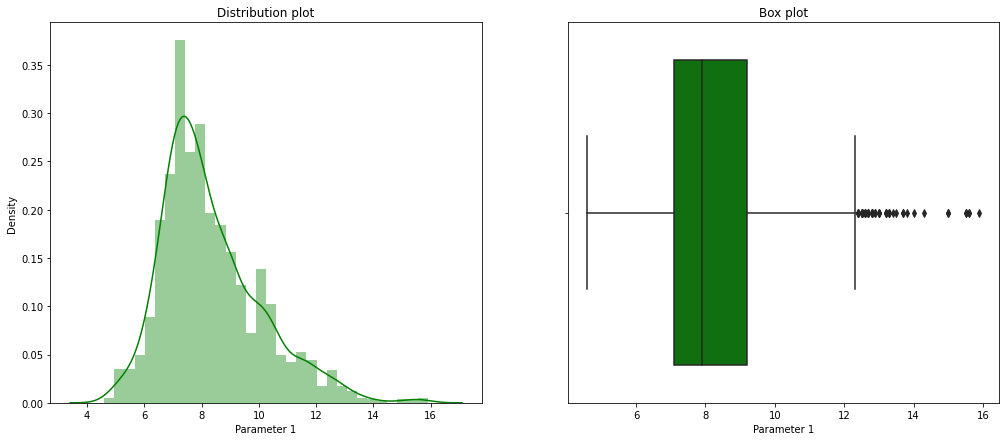

Total Number of Outliers in Parameter 1 =  49.00


In [94]:
# Parameter 1
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'Parameter 1', data=signal_data,  orient='h' , ax=axes[1],color='Green').set_title('Box plot')
sns.distplot(signal_data['Parameter 1'],  ax=axes[0],color='Green').set_title('Distribution plot')
plt.show()
# Checking Number of outliers
q1, q3= np.percentile(signal_data['Parameter 1'],[25,75])
IQR = q3-q1
lower,upper = q1-1.5*IQR, q3+1.5*IQR
outliers = ((signal_data['Parameter 1'] < lower) | (signal_data['Parameter 1'] > upper)).sum()
print('Total Number of Outliers in Parameter 1 =  %1.2f'%outliers)

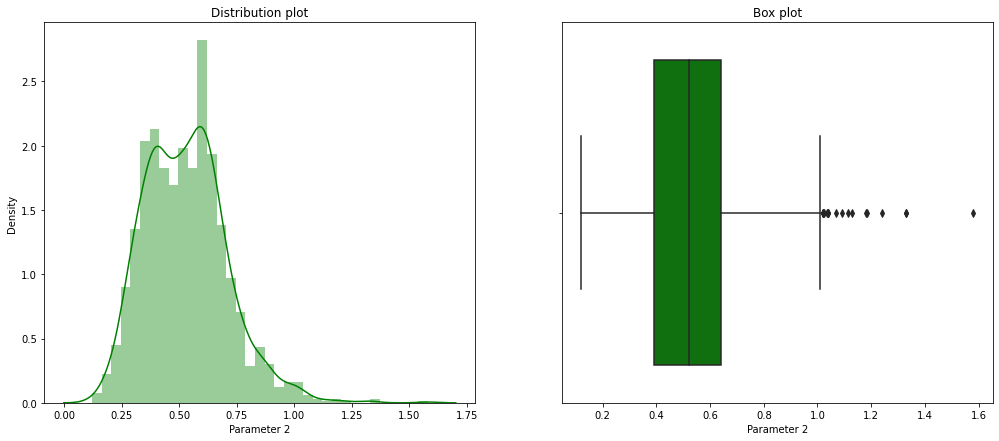

Total Number of Outliers in Parameter 2 =  19.00


In [95]:
# Parameter 2
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'Parameter 2', data=signal_data,  orient='h' , ax=axes[1],color='Green').set_title('Box plot')
sns.distplot(signal_data['Parameter 2'],  ax=axes[0],color='Green').set_title('Distribution plot')
plt.show()
# Checking Number of outliers
q1, q3= np.percentile(signal_data['Parameter 2'],[25,75])
IQR = q3-q1
lower,upper = q1-1.5*IQR, q3+1.5*IQR
outliers = ((signal_data['Parameter 2'] < lower) | (signal_data['Parameter 2'] > upper)).sum()
print('Total Number of Outliers in Parameter 2 =  %1.2f'%outliers)

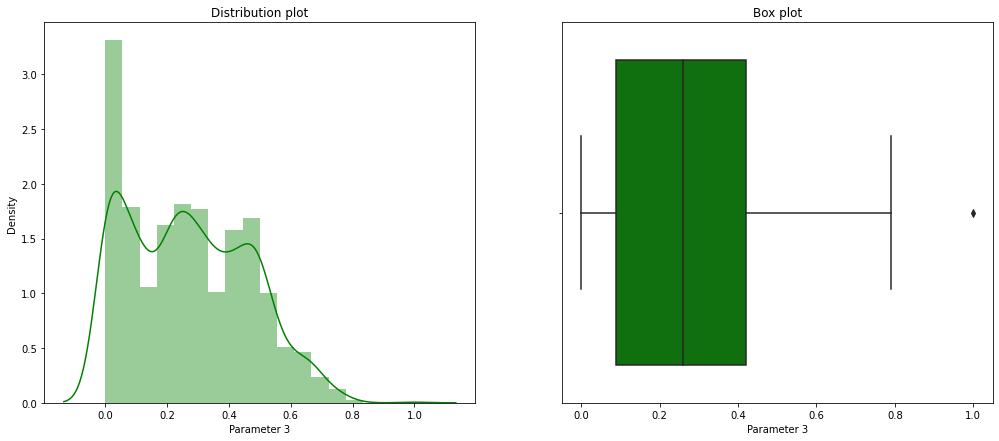

Total Number of Outliers in Parameter 3 =  1.00


In [96]:
# Parameter 3
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'Parameter 3', data=signal_data,  orient='h' , ax=axes[1],color='Green').set_title('Box plot')
sns.distplot(signal_data['Parameter 3'],  ax=axes[0],color='Green').set_title('Distribution plot')
plt.show()
# Checking Number of outliers
q1, q3= np.percentile(signal_data['Parameter 3'],[25,75])
IQR = q3-q1
lower,upper = q1-1.5*IQR, q3+1.5*IQR
outliers = ((signal_data['Parameter 3'] < lower) | (signal_data['Parameter 3'] > upper)).sum()
print('Total Number of Outliers in Parameter 3 =  %1.2f'%outliers)

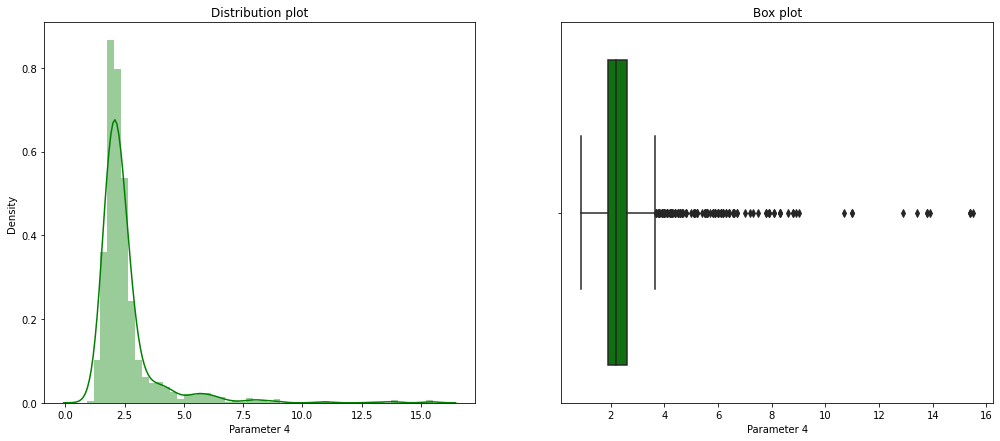

Total Number of Outliers in Parameter 4 =  155.00


In [97]:
# Parameter 4
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'Parameter 4', data=signal_data,  orient='h' , ax=axes[1],color='Green').set_title('Box plot')
sns.distplot(signal_data['Parameter 4'],  ax=axes[0],color='Green').set_title('Distribution plot')
plt.show()
# Checking Number of outliers
q1, q3= np.percentile(signal_data['Parameter 4'],[25,75])
IQR = q3-q1
lower,upper = q1-1.5*IQR, q3+1.5*IQR
outliers = ((signal_data['Parameter 4'] < lower) | (signal_data['Parameter 4'] > upper)).sum()
print('Total Number of Outliers in Parameter 4 =  %1.2f'%outliers)

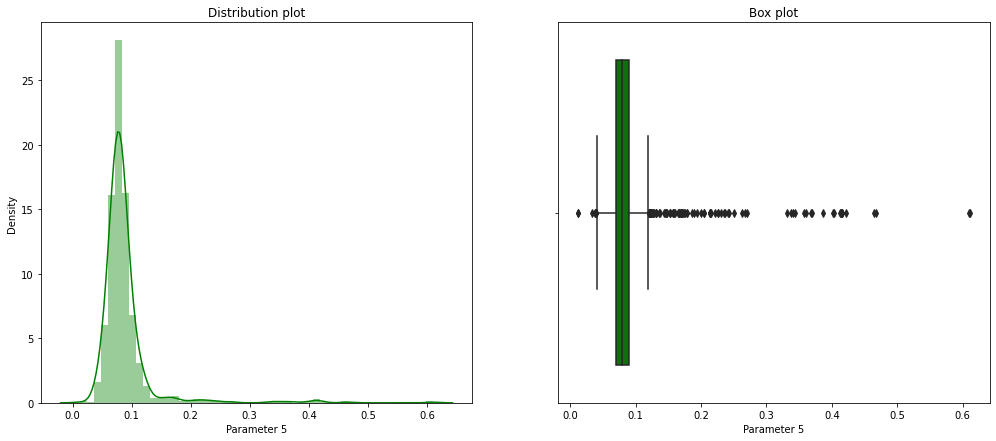

Total Number of Outliers in Parameter 5 =  112.00


In [98]:
# Parameter 5
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'Parameter 5', data=signal_data,  orient='h' , ax=axes[1],color='Green').set_title('Box plot')
sns.distplot(signal_data['Parameter 5'],  ax=axes[0],color='Green').set_title('Distribution plot')
plt.show()
# Checking Number of outliers
q1, q3= np.percentile(signal_data['Parameter 5'],[25,75])
IQR = q3-q1
lower,upper = q1-1.5*IQR, q3+1.5*IQR
outliers = ((signal_data['Parameter 5'] < lower) | (signal_data['Parameter 5'] > upper)).sum()
print('Total Number of Outliers in Parameter 5 =  %1.2f'%outliers)

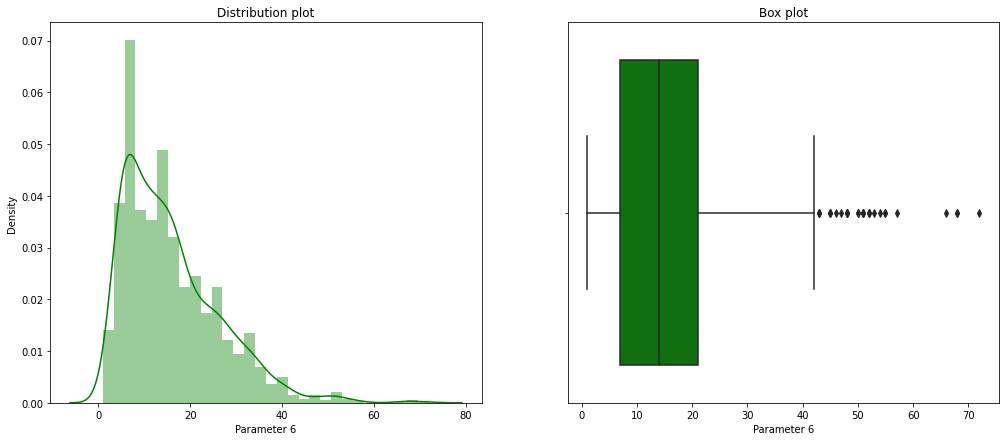

Total Number of Outliers in Parameter 6 =  30.00


In [99]:
# Parameter 6
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'Parameter 6', data=signal_data,  orient='h' , ax=axes[1],color='Green').set_title('Box plot')
sns.distplot(signal_data['Parameter 6'],  ax=axes[0],color='Green').set_title('Distribution plot')
plt.show()
# Checking Number of outliers
q1, q3= np.percentile(signal_data['Parameter 6'],[25,75])
IQR = q3-q1
lower,upper = q1-1.5*IQR, q3+1.5*IQR
outliers = ((signal_data['Parameter 6'] < lower) | (signal_data['Parameter 6'] > upper)).sum()
print('Total Number of Outliers in Parameter 6 =  %1.2f'%outliers)

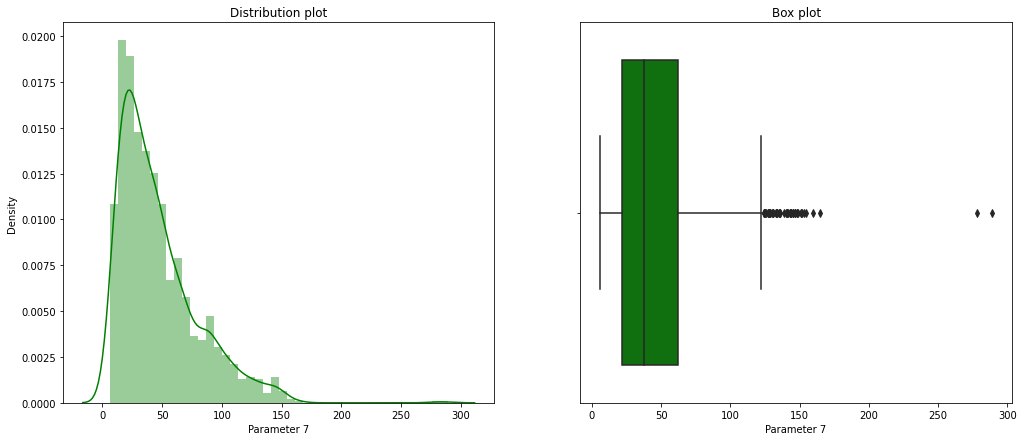

Total Number of Outliers in Parameter 7 =  55.00


In [100]:
# Parameter 7
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'Parameter 7', data=signal_data,  orient='h' , ax=axes[1],color='Green').set_title('Box plot')
sns.distplot(signal_data['Parameter 7'],  ax=axes[0],color='Green').set_title('Distribution plot')
plt.show()
# Checking Number of outliers
q1, q3= np.percentile(signal_data['Parameter 7'],[25,75])
IQR = q3-q1
lower,upper = q1-1.5*IQR, q3+1.5*IQR
outliers = ((signal_data['Parameter 7'] < lower) | (signal_data['Parameter 7'] > upper)).sum()
print('Total Number of Outliers in Parameter 7 =  %1.2f'%outliers)

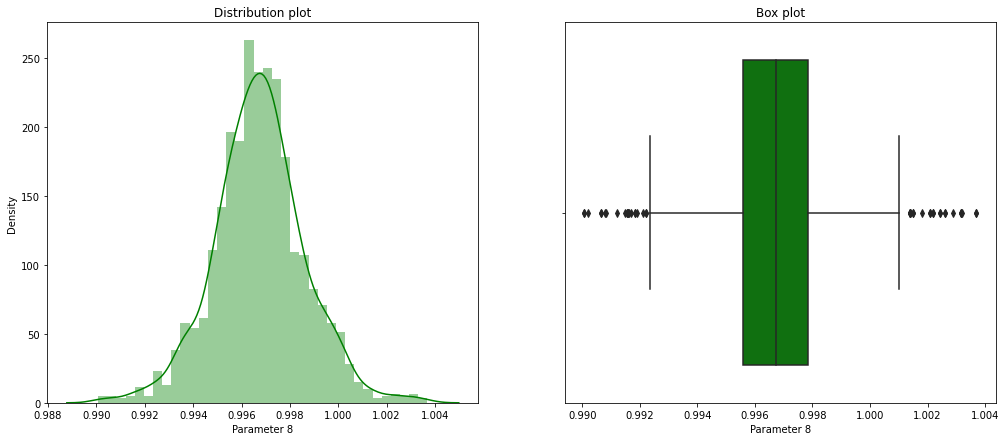

Total Number of Outliers in Parameter 8 =  45.00


In [101]:
# Parameter 8
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'Parameter 8', data=signal_data,  orient='h' , ax=axes[1],color='Green').set_title('Box plot')
sns.distplot(signal_data['Parameter 8'],  ax=axes[0],color='Green').set_title('Distribution plot')
plt.show()
# Checking Number of outliers
q1, q3= np.percentile(signal_data['Parameter 8'],[25,75])
IQR = q3-q1
lower,upper = q1-1.5*IQR, q3+1.5*IQR
outliers = ((signal_data['Parameter 8'] < lower) | (signal_data['Parameter 8'] > upper)).sum()
print('Total Number of Outliers in Parameter 8 =  %1.2f'%outliers)

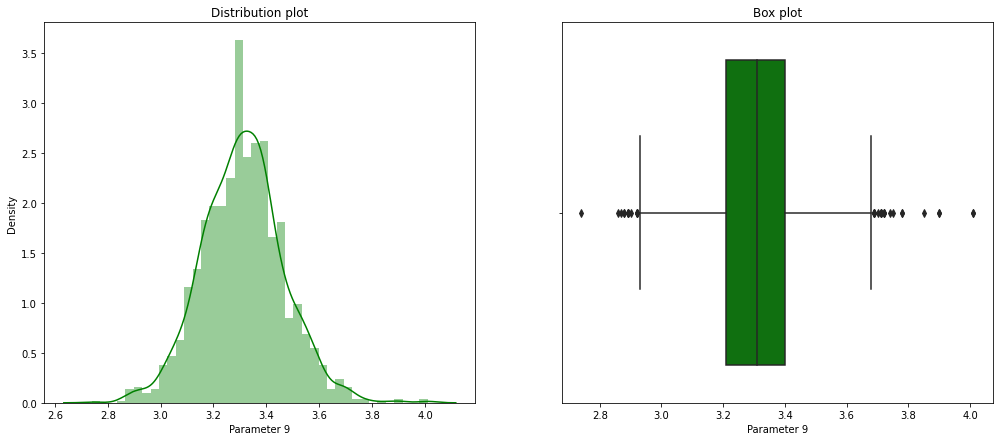

Total Number of Outliers in Parameter 9 =  35.00


In [102]:
# Parameter 9
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'Parameter 9', data=signal_data,  orient='h' , ax=axes[1],color='Green').set_title('Box plot')
sns.distplot(signal_data['Parameter 9'],  ax=axes[0],color='Green').set_title('Distribution plot')
plt.show()
# Checking Number of outliers
q1, q3= np.percentile(signal_data['Parameter 9'],[25,75])
IQR = q3-q1
lower,upper = q1-1.5*IQR, q3+1.5*IQR
outliers = ((signal_data['Parameter 9'] < lower) | (signal_data['Parameter 9'] > upper)).sum()
print('Total Number of Outliers in Parameter 9 =  %1.2f'%outliers)

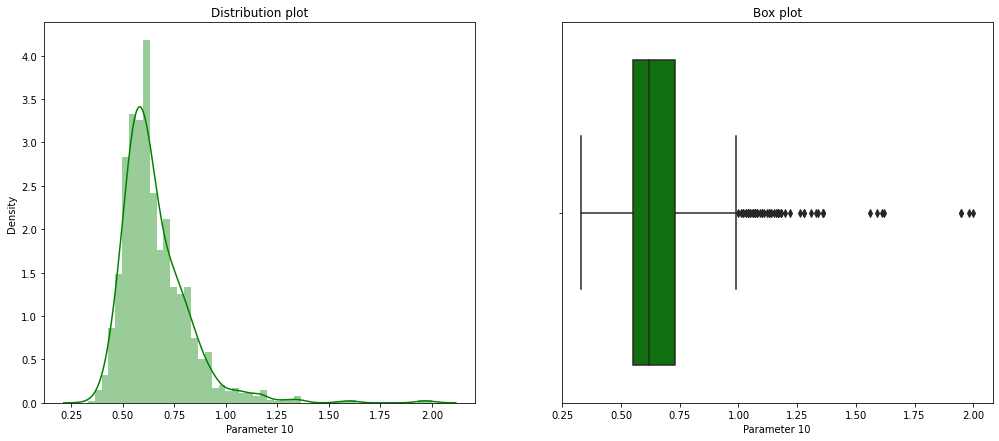

Total Number of Outliers in Parameter 10 =  59.00


In [103]:
# Parameter 10
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'Parameter 10', data=signal_data,  orient='h' , ax=axes[1],color='Green').set_title('Box plot')
sns.distplot(signal_data['Parameter 10'],  ax=axes[0],color='Green').set_title('Distribution plot')
plt.show()
# Checking Number of outliers
q1, q3= np.percentile(signal_data['Parameter 10'],[25,75])
IQR = q3-q1
lower,upper = q1-1.5*IQR, q3+1.5*IQR
outliers = ((signal_data['Parameter 10'] < lower) | (signal_data['Parameter 10'] > upper)).sum()
print('Total Number of Outliers in Parameter 10 =  %1.2f'%outliers)

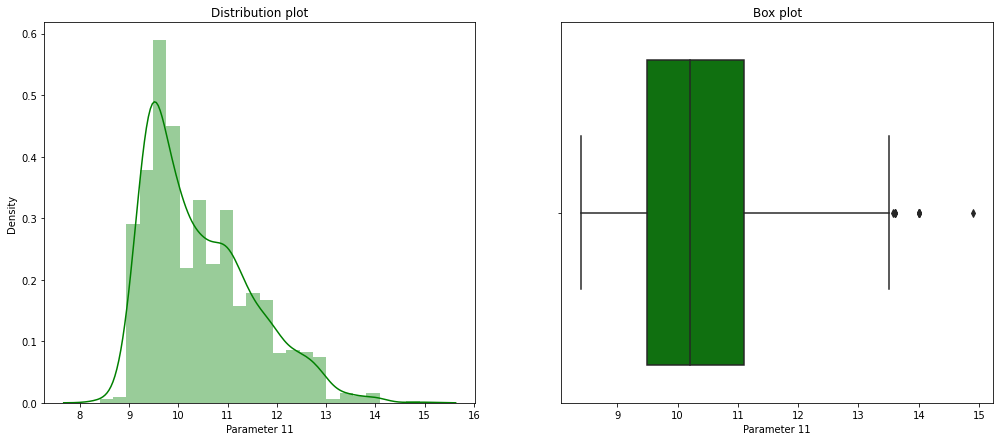

Total Number of Outliers in Parameter 11=  13.00


In [104]:
# Parameter 11
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'Parameter 11', data=signal_data,  orient='h' , ax=axes[1],color='Green').set_title('Box plot')
sns.distplot(signal_data['Parameter 11'],  ax=axes[0],color='Green').set_title('Distribution plot')
plt.show()
# Checking Number of outliers
q1, q3= np.percentile(signal_data['Parameter 11'],[25,75])
IQR = q3-q1
lower,upper = q1-1.5*IQR, q3+1.5*IQR
outliers = ((signal_data['Parameter 11'] < lower) | (signal_data['Parameter 11'] > upper)).sum()
print('Total Number of Outliers in Parameter 11=  %1.2f'%outliers)

**Summary from Univariate Analysis** : 

- Parameters 4,5 and 7 are most skewed towards right.

- Parameters 8 and 9 are having outliers on both sides.

- Every parameters are having outliers needs treatment by imputing either with mean or median.


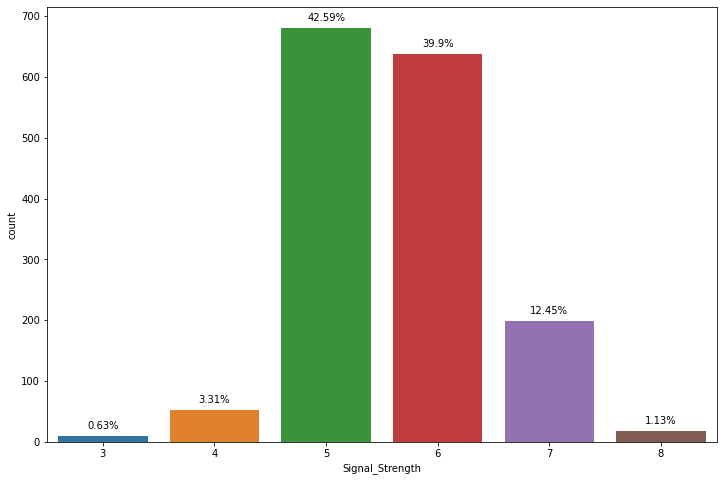

In [105]:
fig, ax = plt.subplots(figsize=(20,8))
width = len(signal_data['Signal_Strength'].unique())+6
fig.set_size_inches(width , 8)
ax=sns.countplot(data = signal_data, x= 'Signal_Strength') 



for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(signal_data)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')


Quality of signal strength is good with class 5 and 6

## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Bivariate Analysis

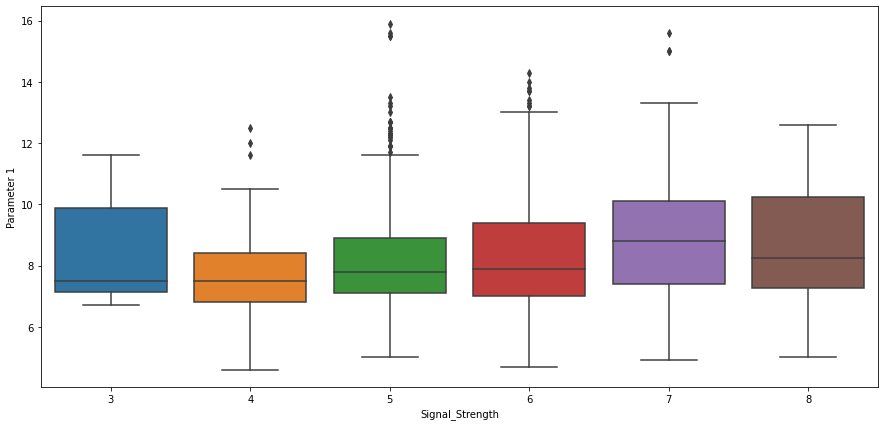

In [106]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Signal_Strength', y='Parameter 1', data= signal_data)
plt.show()

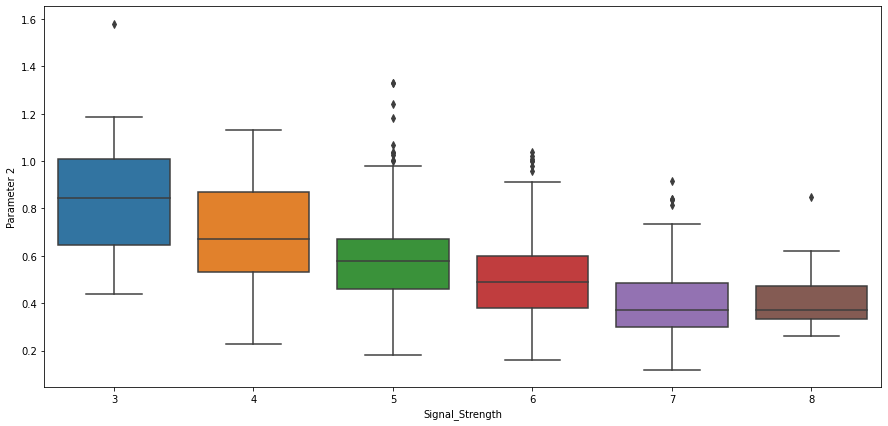

In [107]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Signal_Strength', y='Parameter 2', data= signal_data)
plt.show()

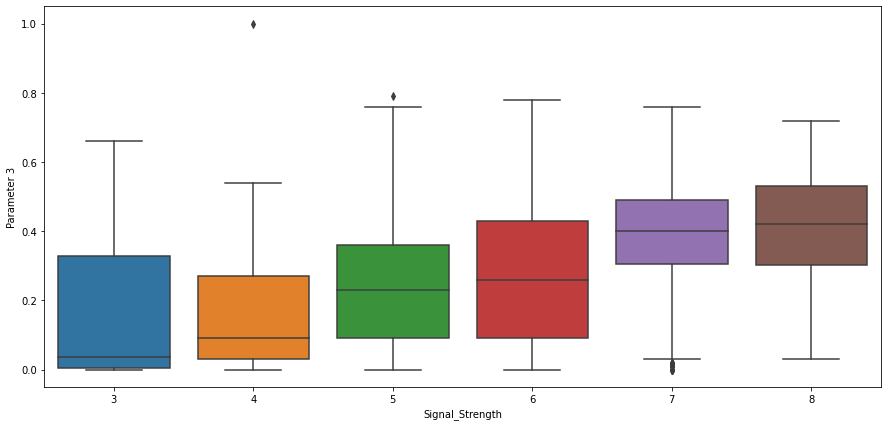

In [108]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Signal_Strength', y='Parameter 3', data= signal_data)
plt.show()

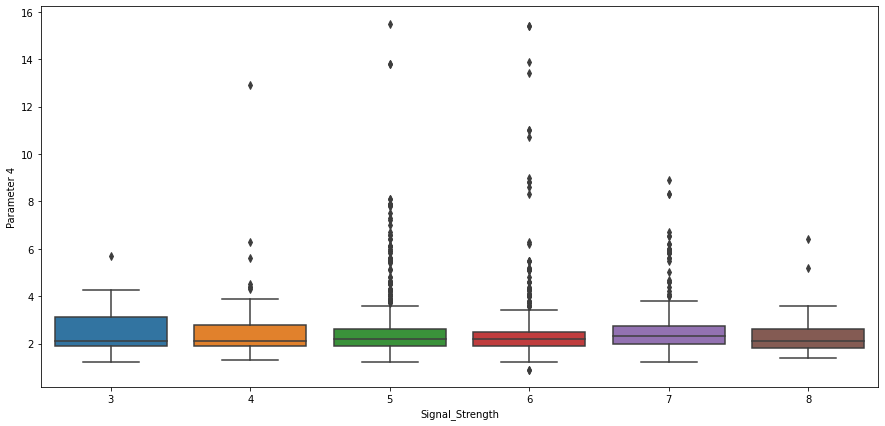

In [109]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Signal_Strength', y='Parameter 4', data= signal_data)
plt.show()

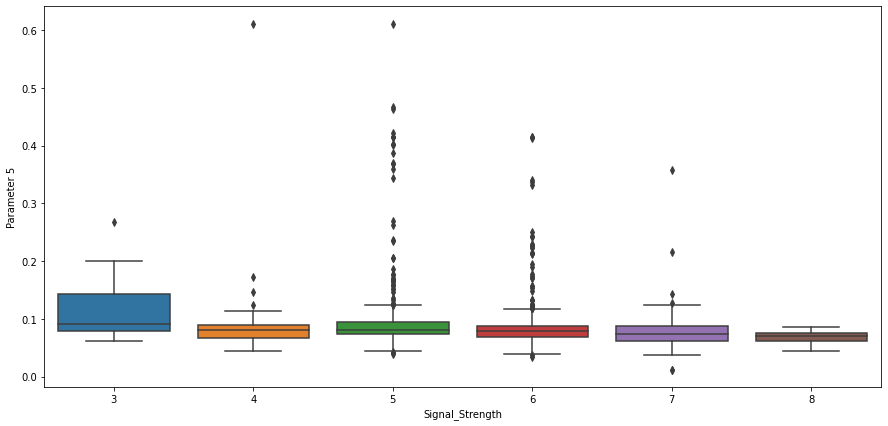

In [110]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Signal_Strength', y='Parameter 5', data= signal_data)
plt.show()

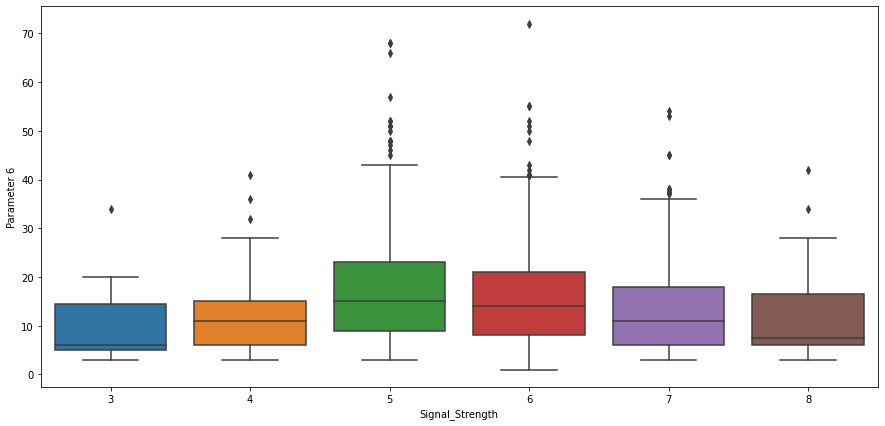

In [111]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Signal_Strength', y='Parameter 6', data= signal_data)
plt.show()

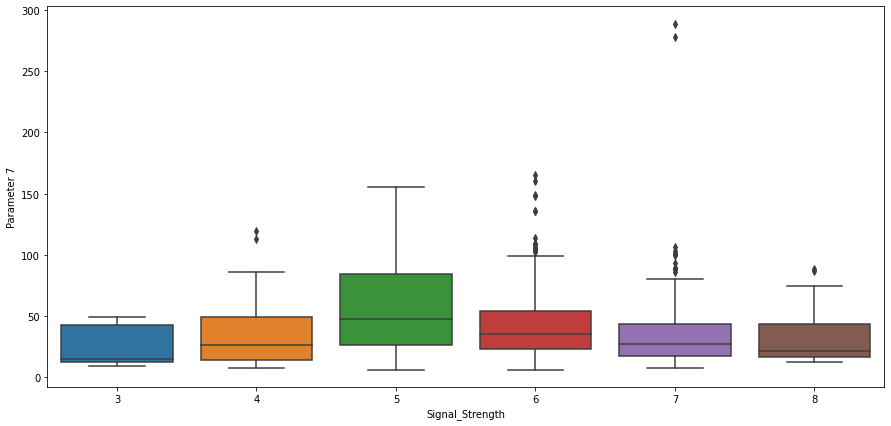

In [112]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Signal_Strength', y='Parameter 7', data= signal_data)
plt.show()

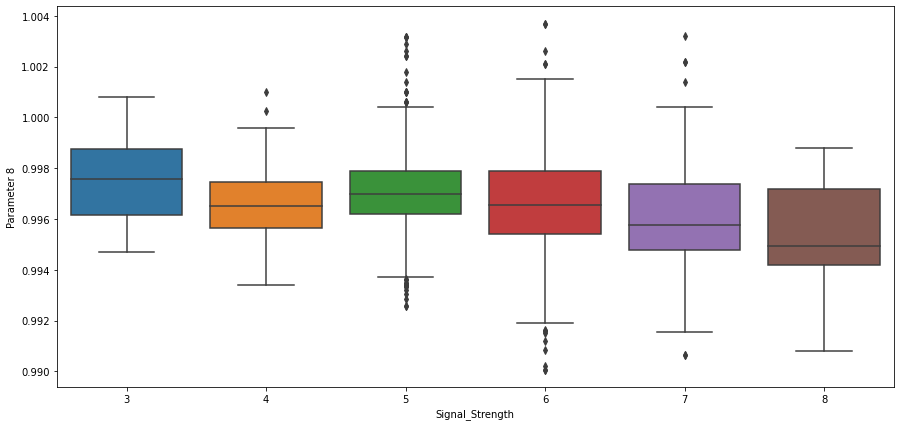

In [113]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Signal_Strength', y='Parameter 8', data= signal_data)
plt.show()

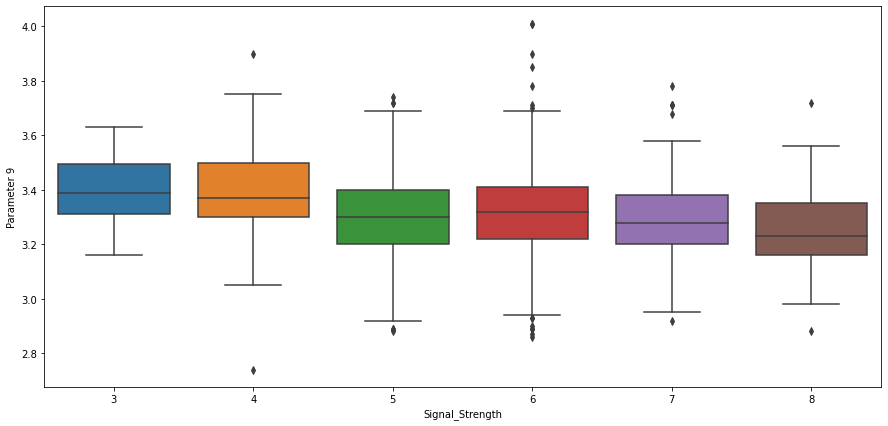

In [114]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Signal_Strength', y='Parameter 9', data= signal_data)
plt.show()

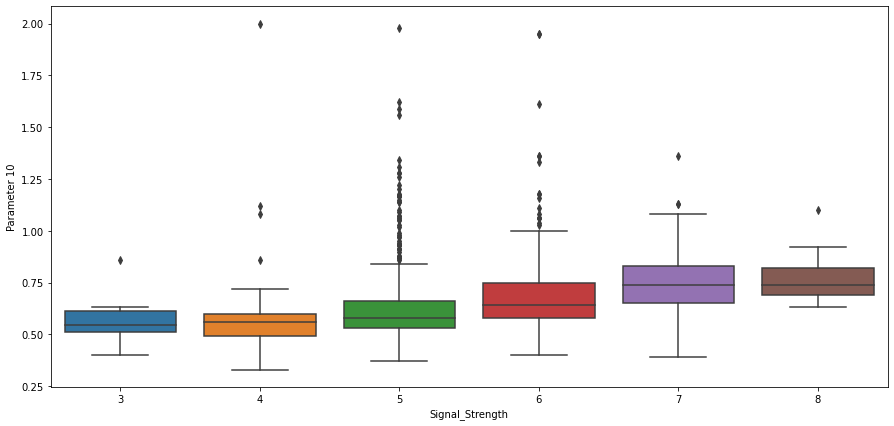

In [115]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Signal_Strength', y='Parameter 10', data= signal_data)
plt.show()

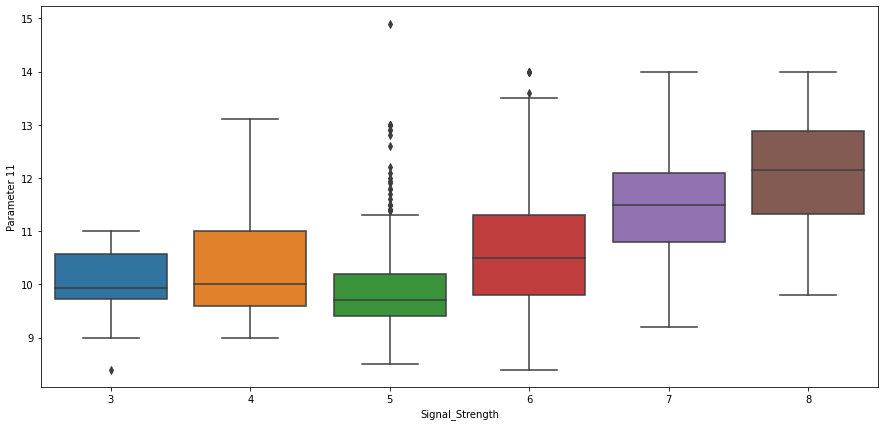

In [116]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Signal_Strength', y='Parameter 11', data= signal_data)
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Multi-variate Analysis

In [117]:
signal_data.columns

Index(['Parameter 1', 'Parameter 2', 'Parameter 3', 'Parameter 4',
       'Parameter 5', 'Parameter 6', 'Parameter 7', 'Parameter 8',
       'Parameter 9', 'Parameter 10', 'Parameter 11', 'Signal_Strength'],
      dtype='object')

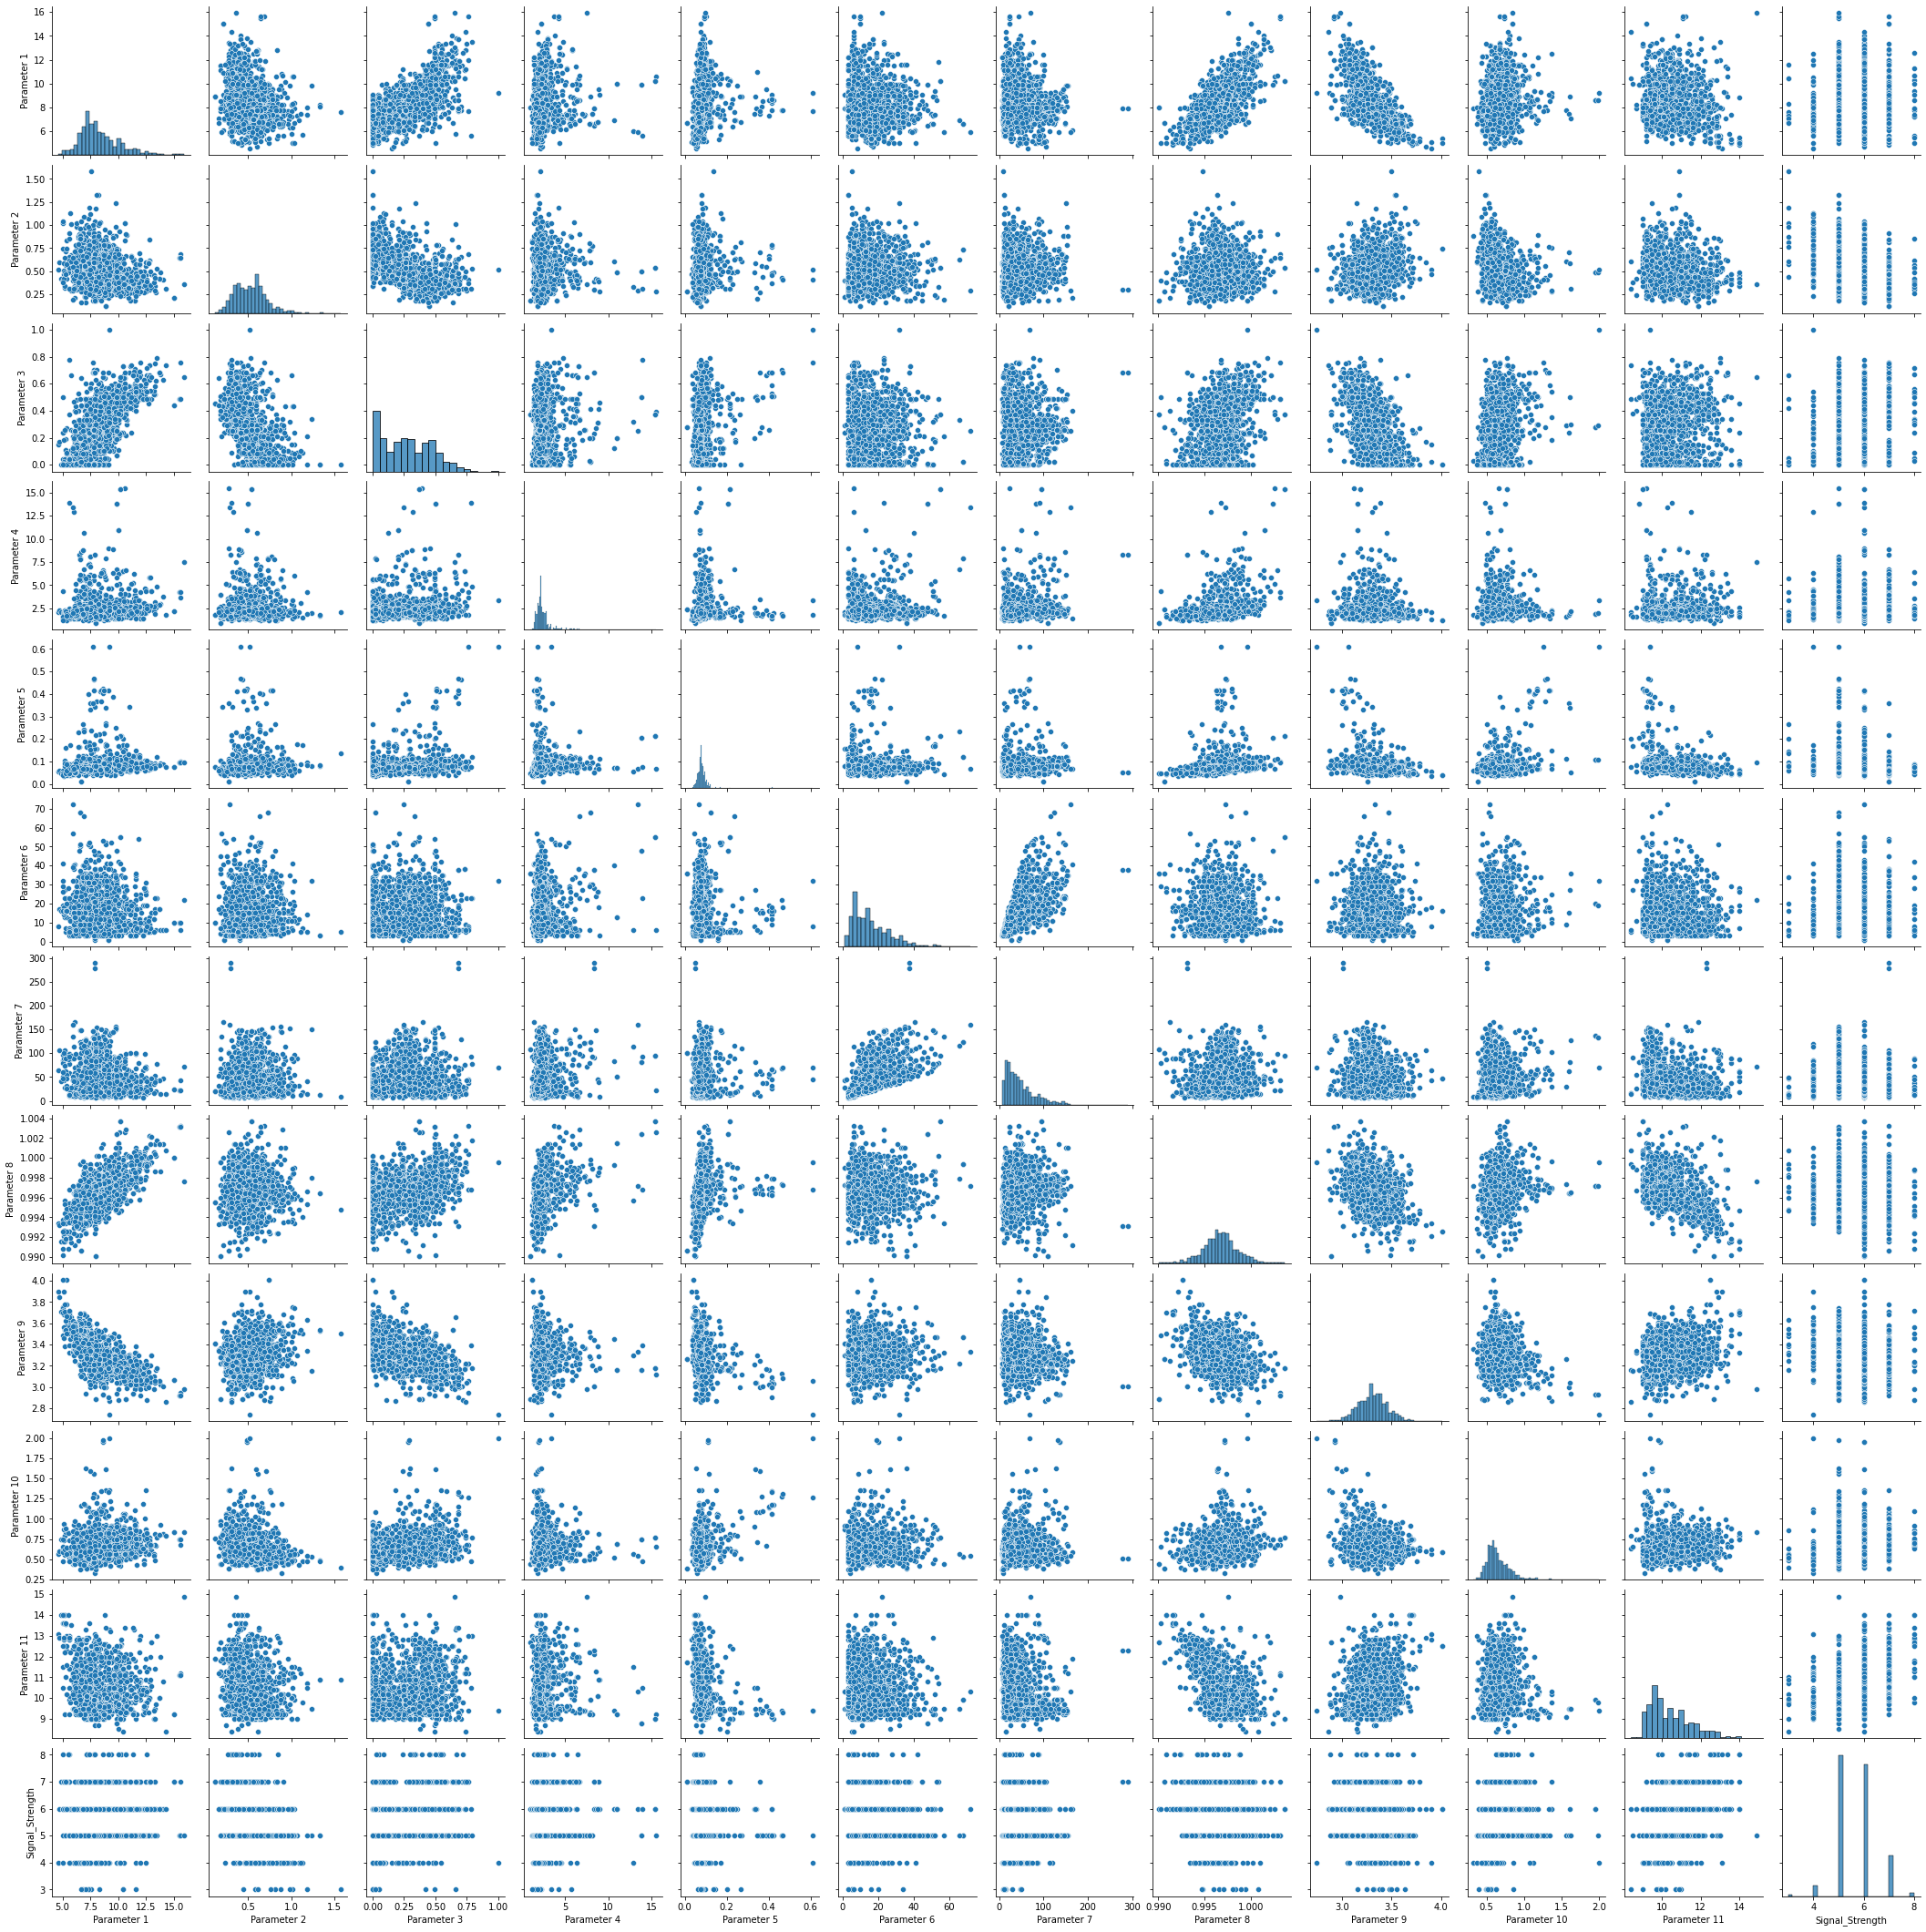

In [118]:
sns.pairplot(signal_data)
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Statistical Analysis

 **coefficient of variation (CV)**  : In statistics and probability theory, coefficient of variation (CV) is a measure of scattering or dispersion of given data points around the mean value.

 CV = Standard Deviation/mean

It is expressed in percentage.

It is useful particularly in those cases where we need to compare results from  different surveys having different values. 

Why we using coefficient of variation : 
Because here for each parameter we have different results for different signal strength quality.


**What is a good coefficient of variation percentage?**

Basically CV<10 is very good, 10-20 is good, 20-30 is acceptable, and CV>30 is not acceptable.


In [119]:
class_summary=signal_data.groupby('Signal_Strength') #getting CV values of each class for all independent variables
((class_summary.std()/class_summary.mean())*100).reset_index()

,Signal_Strength,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11
0,3,21.182721,37.451171,146.586879,53.191511,54.074059,88.762536,67.585853,0.200693,4.239331,21.407024,8.217068
1,4,20.909798,31.717866,115.434554,66.414657,84.023367,73.596014,76.101969,0.158063,5.365674,40.138322,9.106356
2,5,19.149496,28.559695,73.866710,53.769506,57.914503,64.505090,65.458379,0.159312,4.557361,27.547625,7.439827
3,6,21.538401,32.355243,71.253105,58.193892,46.569092,63.271163,61.263293,0.200680,4.641101,23.492178,9.874755
4,7,22.457192,35.953779,51.824282,50.411963,38.459729,72.446362,94.777587,0.218425,4.561288,18.298515,8.389502
5,8,24.743065,34.231599,51.015063,50.238555,17.062226,84.017173,76.046231,0.238972,6.141006,15.027715,10.120439


Summary : 
    
- Coefficient of variation for parameter 1, 2, 8,9, 10 and 11 are very good and in acceptable range for all signal    
   strengths.

- Parameter 5 having very good CV additonally helping to measure the signal strength for equipment 8. 

- We exactly no idea what are these parameters,in case of parameters 3,4,5,6,7, weak dispersion of data might have positive impact on signal strength. We cannot judge. 

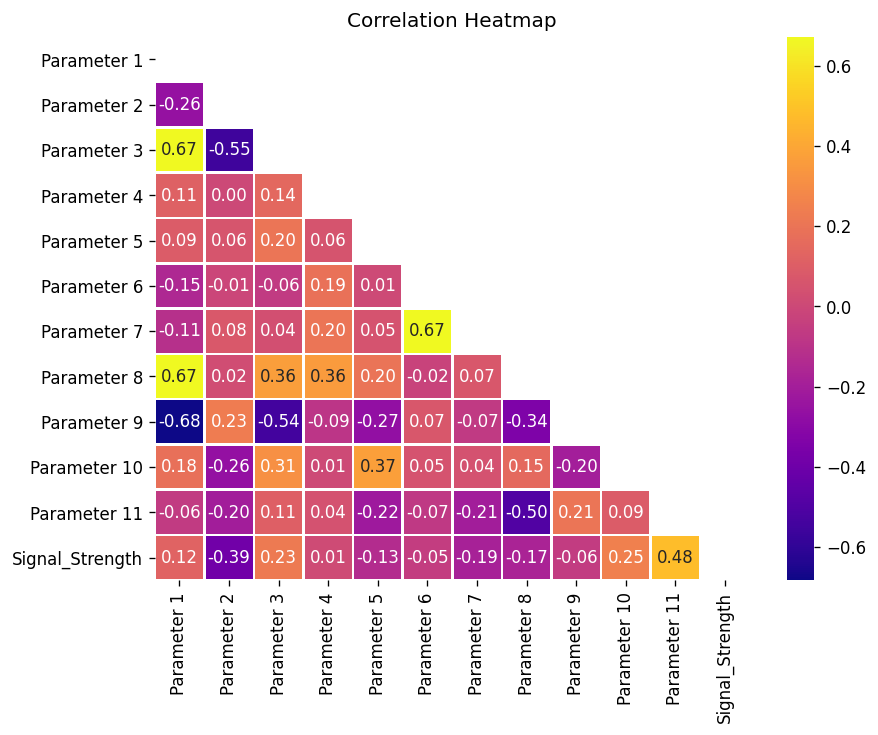

In [120]:
# Checking Correlation Heatmap
plt.figure(dpi = 120,figsize= (8,6))
mask = np.triu(np.ones_like(signal_data.corr()))
sns.heatmap(signal_data.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

Explanation : 
    Parameter 1 is highly positive correlated with Parameter 8 and 3 and negative correlation with 9.
    
    Means : When we check Parameter 1 to measure signal strength, possibilty of  parameter 8 and 3 have similar beheviour as that of parameter 1, whereas parameter 9 have opposite influence.

**Imputing outliers with median**

In [121]:
for c in signal_data.columns:
    median = signal_data[c].median()
    print('{} median of {} is : {}'.format('\033[92m',c, median))
    q25,q75 = np.percentile(signal_data[c], [25,75])
    IQR = q75-q25
    lower,upper = q25-1.5*IQR, q75+1.5*IQR
    Outliers=[i for i in signal_data[c] if i < lower or i > upper]
    print('{} Total Number of outliers in {} Before Imputing : {}'.format('\033[92m',c,len(Outliers)))
    print('\n')
    signal_data[c] = np.where(signal_data[c] > upper, median, signal_data[c])
    signal_data[c] = np.where(signal_data[c] < lower, median, signal_data[c])
    Outliers=[i for i in signal_data[c] if i < lower or i > upper]
    print('{} Total Number of outliers in {} After Imputing : {}'.format('\033[92m',c,len(Outliers)))  
    print('\n')

 median of Parameter 1 is : 7.9
 Total Number of outliers in Parameter 1 Before Imputing : 49


 Total Number of outliers in Parameter 1 After Imputing : 0


 median of Parameter 2 is : 0.52
 Total Number of outliers in Parameter 2 Before Imputing : 19


 Total Number of outliers in Parameter 2 After Imputing : 0


 median of Parameter 3 is : 0.26
 Total Number of outliers in Parameter 3 Before Imputing : 1


 Total Number of outliers in Parameter 3 After Imputing : 0


 median of Parameter 4 is : 2.2
 Total Number of outliers in Parameter 4 Before Imputing : 155


 Total Number of outliers in Parameter 4 After Imputing : 0


 median of Parameter 5 is : 0.079
 Total Number of outliers in Parameter 5 Before Imputing : 112


 Total Number of outliers in Parameter 5 After Imputing : 0


 median of Parameter 6 is : 14.0
 Total Number of outliers in Parameter 6 Before Imputing : 30


 Total Number of outliers in Parameter 6 After Imputing : 0


 median of Parameter 7 is : 38.0
 Total Number

 <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Design, train, tune and test a neural network regressor

In [122]:
X_data = signal_data.iloc[:, :-1]

In [123]:
X_data.shape

(1599, 11)

In [124]:
X_data.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [125]:
y_data = signal_data.iloc[:, -1]

In [126]:
y_data.shape

(1599,)

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state = 7)

### Normalize the train and test data

In [128]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [129]:
X_train

array([[-0.14990624, -0.38491722,  1.8837492 , ..., -2.26109366,
         2.00527599, -0.16723707],
       [-0.08213315,  1.72747943, -0.0905883 , ..., -0.84873832,
        -1.82308702, -1.16241174],
       [-0.82763718,  1.45588557, -1.28558205, ...,  1.83473682,
         1.23960339, -0.46578947],
       ...,
       [-0.01436005,  1.81801071, -0.14254455, ...,  0.42238148,
         1.15452865,  0.33035027],
       [ 1.88328657, -1.22987588,  1.31223045, ..., -0.21317842,
         1.15452865,  1.12649   ],
       [-0.82763718, -0.14350046, -1.18166955, ...,  0.28114595,
         1.23960339, -0.86385934]])

In [130]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1279, 11)
(320, 11)
(1279,)
(320,)


### 1. Creating a model

Keras model object can be created with Sequential class

At the outset, the model is empty per se. It is completed by adding additional layers and compilation

Ref: https://keras.io/models/sequential/

In [154]:
model = Sequential()

### 2. Adding layers [layers and activations]

Keras layers can be added to the model

Adding layers are like stacking lego blocks one by one

It should be noted that as this is a classification problem, sigmoid layer (softmax for multi-class problems) should be added

Ref: https://keras.io/layers/core/

In [155]:
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model.add(Dense(20, input_shape = (11,), activation = 'relu',kernel_initializer='he_uniform'))
# Add batchnormalization to model
model.add(BatchNormalization())

# Add 2nd hidden layer
model.add(Dense(20,activation = 'relu',kernel_initializer='he_uniform'))
# Add batchnormalization to model
model.add(BatchNormalization())



In [156]:
# Adding the output layer
# Notice that we do not need to specify input dim. 
# we have an output of 1 node, which is the the desired dimensions of our output
# We use either linear or relu because its a regression model
model.add(Dense(1,activation='linear')) 

In [157]:
# Create optimizer with default learning rate
# sgd_optimizer = tf.keras.optimizers.SGD()
# Compile the model
# Use mean squared error as loss function,as we are working on regression.
model.compile(optimizer='SGD', loss='mean_squared_error',metrics=['mse'])

In [158]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_84 (Dense)             (None, 20)                240       
_________________________________________________________________
batch_normalization_64 (Batc (None, 20)                80        
_________________________________________________________________
dense_85 (Dense)             (None, 20)                420       
_________________________________________________________________
batch_normalization_65 (Batc (None, 20)                80        
_________________________________________________________________
dense_86 (Dense)             (None, 1)                 21        
Total params: 841
Trainable params: 761
Non-trainable params: 80
_________________________________________________________________


In [159]:
history = model.fit(X_train, y_train,
          epochs=100,
          batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/100
32/32 [==============================] - 1s 7ms/step - loss: 8.2718 - mse: 8.2718 - val_loss: 0.7301 - val_mse: 0.7301
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8713 - mse: 0.8713 - val_loss: 0.5826 - val_mse: 0.5826
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6834 - mse: 0.6834 - val_loss: 0.5381 - val_mse: 0.5381
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6131 - mse: 0.6131 - val_loss: 0.5221 - val_mse: 0.5221
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5376 - mse: 0.5376 - val_loss: 0.5042 - val_mse: 0.5042
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.5343 - mse: 0.5343 - val_loss: 0.4922 - val_mse: 0.4922
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5060 - mse: 0.5060 - val_loss: 0.4832 - val_mse: 0.4832
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.4778 - m

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


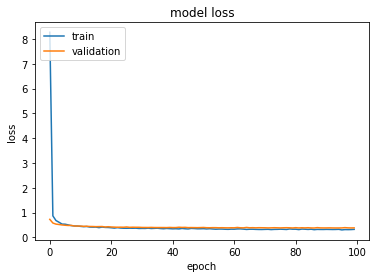

In [160]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [161]:
results_1 = model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.3496 - mse: 0.3496


In [181]:
#Store the loss results for each model in a dataframe for final comparison
results_on_val = pd.DataFrame({'Method':['NN_SGD'], 'Test_loss': results_1[0]},index={'1'})
results_on_val = results_on_val[['Method', 'Test_loss']]
results_on_val

,Method,Test_loss
1,NN_SGD,0.34963


Change optimizer from SGD to adam

In [163]:

model_1 = Sequential()

# Create input layer and hidden layers

# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model_1.add(Dense(20, input_shape = (11,),kernel_initializer='he_normal'))
# Add batchnormalization to model
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))


# Add 2nd hidden layer
model_1.add(Dense(20,kernel_initializer='he_normal'))
# Add batchnormalization to model
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))



# Output layer
model_1.add(Dense(1,activation='relu')) 

# compile model


model_1.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse'])

model_1.summary()

# model fit

history_1 = model_1.fit(X_train, y_train,
          epochs=100,
          batch_size=10, verbose=1, validation_split=0.2) #callbacks=[callback]

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_87 (Dense)             (None, 20)                240       
_________________________________________________________________
batch_normalization_66 (Batc (None, 20)                80        
_________________________________________________________________
activation_60 (Activation)   (None, 20)                0         
_________________________________________________________________
dense_88 (Dense)             (None, 20)                420       
_________________________________________________________________
batch_normalization_67 (Batc (None, 20)                80        
_________________________________________________________________
activation_61 (Activation)   (None, 20)                0         
_________________________________________________________________
dense_89 (Dense)             (None, 1)               

**We can observe that val loss is less when we use adam**

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


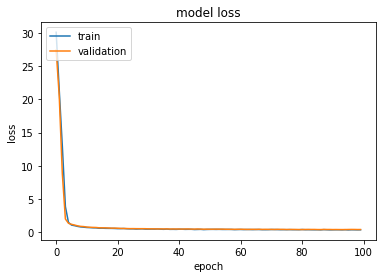

In [164]:
print(history_1.history.keys())
# "Loss"
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [165]:
results_2 = model_1.evaluate(X_test, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.3366 - mse: 0.3366


In [182]:
#Store the loss results for each model in a dataframe for final comparison
results_on_val_1 = pd.DataFrame({'Method':['NN_adam'], 'Test_loss': results_2[0]},index={'2'})
results_on_val= pd.concat([results_on_val, results_on_val_1])
results_on_val = results_on_val[['Method', 'Test_loss']]
results_on_val

,Method,Test_loss
1,NN_SGD,0.349630
2,NN_adam,0.336636


Adam is giving better result than sgd

Add number of layers and number of nuerons with adam

In [167]:

model_2 = Sequential()

# Create input layer and hidden layers

# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model_2.add(Dense(32, input_shape = (11,),kernel_initializer='he_normal'))
# Add batchnormalization to model
model_2.add(BatchNormalization())
model_2.add(Activation('relu'))


# Add 2nd hidden layer
model_2.add(Dense(16,kernel_initializer='he_normal'))
# Add batchnormalization to model
model_2.add(BatchNormalization())
model_2.add(Activation('relu'))


# Add 3rd hidden layer
model_2.add(Dense(8,kernel_initializer='he_normal'))
# Add batchnormalization to model
model_2.add(BatchNormalization())
model_2.add(Activation('relu'))




# Output layer
model_2.add(Dense(1,activation='relu')) 

# compile model


model_2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse'])

model_2.summary()

# model fit
#callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=4)
history_2 = model_2.fit(X_train, y_train,
          epochs=100,
          batch_size=10, verbose=1, validation_split=0.2)#,callbacks=[callback]

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_90 (Dense)             (None, 32)                384       
_________________________________________________________________
batch_normalization_68 (Batc (None, 32)                128       
_________________________________________________________________
activation_62 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_91 (Dense)             (None, 16)                528       
_________________________________________________________________
batch_normalization_69 (Batc (None, 16)                64        
_________________________________________________________________
activation_63 (Activation)   (None, 16)                0         
_________________________________________________________________
dense_92 (Dense)             (None, 8)               

Observation : 
    
- After increasing layers and nuerons we are able to remove the overfitting

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


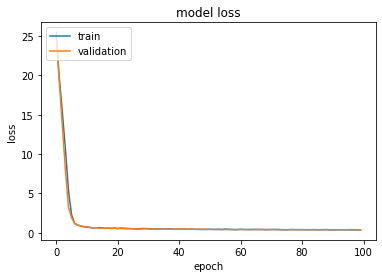

In [168]:
print(history_2.history.keys())
# "Loss"
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [169]:
results_3 = model_2.evaluate(X_test, y_test)

10/10 [==============================] - 0s 3ms/step - loss: 0.3305 - mse: 0.3305


In [183]:
#Store the loss results for each model in a dataframe for final comparison
results_on_val_1 = pd.DataFrame({'Method':['Adam_layers'], 'Test_loss': results_3[0]},index={'3'})
results_on_val= pd.concat([results_on_val, results_on_val_1])
results_on_val = results_on_val[['Method', 'Test_loss']]
results_on_val

,Method,Test_loss
1,NN_SGD,0.349630
2,NN_adam,0.336636
3,Adam_layers,0.330491


We can see improvement in the result as loss reduced to some extent

# Lets add dropout and check the loss 

In [171]:

model_3 = Sequential()

# Create input layer and hidden layers

# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model_3.add(Dense(64, input_shape = (11,),kernel_initializer='he_normal'))
# Add batchnormalization to model
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))
model_3.add(Dropout(0.2))

# Add 2nd hidden layer
model_3.add(Dense(32,kernel_initializer='he_normal'))
# Add batchnormalization to model
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))
model_3.add(Dropout(0.2))

# Add 3rd hidden layer
model_3.add(Dense(16,kernel_initializer='he_normal'))
# Add batchnormalization to model
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))
model_3.add(Dropout(0.2))

# Add 4th hidden layer
model_3.add(Dense(8,kernel_initializer='he_normal'))
# Add batchnormalization to model
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))
model_3.add(Dropout(0.2))

# Output layer
model_3.add(Dense(1)) 

# compile model


model_3.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse'])

model_3.summary()

# model fit
#callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
history_3 = model_3.fit(X_train, y_train,
          epochs=100,
          batch_size=10, verbose=1, validation_split=0.2) #callbacks=[callback]

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_94 (Dense)             (None, 64)                768       
_________________________________________________________________
batch_normalization_71 (Batc (None, 64)                256       
_________________________________________________________________
activation_65 (Activation)   (None, 64)                0         
_________________________________________________________________
dropout_36 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_95 (Dense)             (None, 32)                2080      
_________________________________________________________________
batch_normalization_72 (Batc (None, 32)                128       
_________________________________________________________________
activation_66 (Activation)   (None, 32)              

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


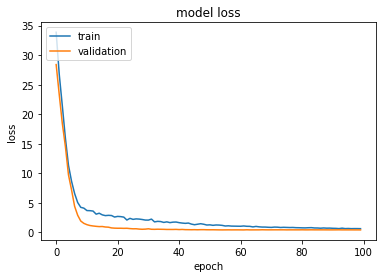

In [172]:
print(history_3.history.keys())
# "Loss"
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Observation : 

- We can see that validation loss value is little lower than training loss.

Reason : This happens when we use Dropout, since the behaviour when training and validation are different.

When training, a percentage of the features are set to zero (20% in out case since we are using Dropout(0.2)). When validation/testing, all features are used (and are scaled appropriately). So the model at test time is more robust - and can lead to higher testing/ validation accuracies or lower testing/validation loss. 

In [173]:
results_4 = model_3.evaluate(X_test, y_test)

10/10 [==============================] - 0s 3ms/step - loss: 0.3224 - mse: 0.3224


In [184]:
#Store the loss results for each model in a dataframe for final comparison
results_on_val_1 = pd.DataFrame({'Method':['Adam_layers_dropout'], 'Test_loss': results_4[0]},index={'4'})
results_on_val= pd.concat([results_on_val, results_on_val_1])
results_on_val = results_on_val[['Method', 'Test_loss']]
results_on_val

,Method,Test_loss
1,NN_SGD,0.349630
2,NN_adam,0.336636
3,Adam_layers,0.330491
4,Adam_layers_dropout,0.322411


WE can see improvement by using dropout

**Lets try by using different learning rate.**


In [177]:
def train_and_test_loop(iterations, lr, Lambda, verb=True):
    model_4 = Sequential()
    
    # Create input layer and hidden layers
    
    # This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
    model_4.add(Dense(64, input_shape = (11,),kernel_initializer='he_normal'))
    # Add batchnormalization to model
    model_4.add(BatchNormalization())
    model_4.add(Activation('relu'))
    model_4.add(Dropout(0.2))
    
    # Add 2nd hidden layer
    model_4.add(Dense(32,kernel_initializer='he_normal'))
    # Add batchnormalization to model
    model_4.add(BatchNormalization())
    model_4.add(Activation('relu'))
    model_4.add(Dropout(0.2))
    
    # Add 3rd hidden layer
    model_4.add(Dense(16,kernel_initializer='he_normal'))
    # Add batchnormalization to model
    model_4.add(BatchNormalization())
    model_4.add(Activation('relu'))
    model_4.add(Dropout(0.2))
    
    # Add 4th hidden layer
    model_4.add(Dense(8,kernel_initializer='he_normal'))
    # Add batchnormalization to model
    model_4.add(BatchNormalization())
    model_4.add(Activation('relu'))
    model_4.add(Dropout(0.2))

    # Output layer
    model_4.add(Dense(1,kernel_regularizer=regularizers.l2(Lambda))) 
    
    # compile model
    
    
    
    opt = keras.optimizers.Adam(learning_rate= lr)
    
    model_4.compile(optimizer=opt, loss='mean_squared_error',metrics=['mse'])
    
    model_4.summary()
    
    # model fit
    #callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
    history_5 = model_4.fit(X_train, y_train,
              epochs=iterations,
              batch_size=10, verbose=1, validation_split=0.2) #callbacks=[callback]

In [180]:
import math
for k in range(1,5):
    lr = math.pow(10, np.random.uniform(-4.0, -1.0))
    Lambda = math.pow(10, np.random.uniform(-4,-2))
    best_loss = train_and_test_loop(100, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 100, best_loss, lr, Lambda))

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_108 (Dense)            (None, 64)                768       
_________________________________________________________________
batch_normalization_83 (Batc (None, 64)                256       
_________________________________________________________________
activation_77 (Activation)   (None, 64)                0         
_________________________________________________________________
dropout_48 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_109 (Dense)            (None, 32)                2080      
_________________________________________________________________
batch_normalization_84 (Batc (None, 32)                128       
_________________________________________________________________
activation_78 (Activation)   (None, 32)              

**Learning Rate have no influence on the result**

# save, load and evaluate Best model 

In [188]:
from keras.models import load_model
# save the model
model.save("D:\\AIML\\Deep_Learning\\GL_Projects\\model_3.h5")

#Load the model
model_reg = load_model("D:\\AIML\\Deep_Learning\\GL_Projects\\model_3.h5")




In [173]:
results_4 = model_reg.evaluate(X_test, y_test)

10/10 [==============================] - 0s 3ms/step - loss: 0.3224 - mse: 0.3224


In [184]:
#Store the loss results for each model in a dataframe for final comparison
results_on_val_1 = pd.DataFrame({'Method':['Adam_layers_dropout'], 'Test_loss': results_4[0]},index={'4'})
results_on_val= pd.concat([results_on_val, results_on_val_1])
results_on_val = results_on_val[['Method', 'Test_loss']]
results_on_val

,Method,Test_loss
1,NN_SGD,0.349630
2,NN_adam,0.336636
3,Adam_layers,0.330491
4,Adam_layers_dropout,0.322411


<span style="font-family: Arial; font-weight:bold;font-size:1.75em;color:#00b3e5;">  Conclusion


The best model to predict the signal strength with the help of 11 parameters is  model_3, having hyperparameters.

- Added 4 hidden layers

- Added drop out and batch normailization

- Added kernal initializer as 'he_normal'

- Tuning of learning rate has no influence on the result. 


<span style="font-family: Arial; font-weight:bold;font-size:3.0em;color:DarkBlue">Part Two



**DOMAIN: Autonomous Vehicles**

BUSINESS CONTEXT: A Recognising multi-digit numbers in photographs captured at street level is an important component of modern-day map making. A classic example of a corpus of such street-level photographs is Google’s Street View imagery composed of hundreds of millions of geo-located 360-degree panoramic images. 
    
The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents. More broadly, recognising numbers in photographs is a problem of interest 
to the optical character recognition community. 
    
While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This 
difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colours, styles, orientations, and character 
arrangements.
    
The recognition problem is further complicated by environmental factors such as lighting, shadows, specularity, and occlusions as well as by image acquisition factors such as resolution, motion, and focus blurs. In this project, we will use the dataset with images centred around a single digit (many of the images do contain 
some distractors at the sides). Although we are taking a sample of the data which is simpler, it is more complex than MNIST because of the distractors.
    
DATA DESCRIPTION: The SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the minimal requirement on 
data formatting but comes from a significantly harder, unsolved, real-world problem (recognising digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images

In [ ]:
#Importing important libraries
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
#To enable plotting graphs in Jupyter notebook
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.layers import Activation, Dense
from keras.layers import BatchNormalization, Dropout


In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Open the file as readonly
svhn_data =h5py.File('/content/gdrive/MyDrive/AIML/GL_Projects/Introduction_NN/Part - 4 - Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')

In [ ]:
svhn_data.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [ ]:
#Load the training, testing, and validation data
X_train=svhn_data['X_train']
X_test=svhn_data['X_test']
X_val=svhn_data['X_val']
y_train=svhn_data['y_train']
y_test=svhn_data['y_test']
y_val=svhn_data['y_val']

In [ ]:
print(" Shape of X_test :", X_test.shape, "and data type : ", X_test.dtype )
print(" Shape of X_train :", X_train.shape, "and data type : ", X_train.dtype )
print(" Shape of X_val :", X_val.shape, "and data type : ", X_val.dtype)
print(" Shape of y_test :", y_test.shape,"and data type : ", y_test.dtype )
print(" Shape of y_train :", y_train.shape,"and data type : ", y_train.dtype)
print(" Shape of y_val :", y_val.shape, "and data type : ", y_val.dtype)

 Shape of X_test : (18000, 32, 32) and data type :  float32
 Shape of X_train : (42000, 32, 32) and data type :  float32
 Shape of X_val : (60000, 32, 32) and data type :  float32
 Shape of y_test : (18000,) and data type :  uint8
 Shape of y_train : (42000,) and data type :  uint8
 Shape of y_val : (60000,) and data type :  uint8


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Data Visualisation

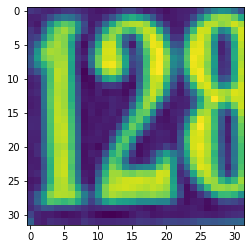

Label:  2


In [ ]:
plt.imshow(X_train[0])    # show first number in the dataset
plt.show()
print('Label: ', y_train[0])

- **We can observe 128 in x_train, but predicted is 2**

- Here 1 and 8 is not visible properly, this is called value padding problem


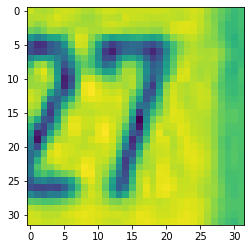

Label:  7


In [ ]:
plt.imshow(X_train[250])    # show 250 number in the dataset
plt.show()
print('Label: ', y_train[250])

We can observe 27 in x_train, but predicted is 7. Because 2 is not much visible

Same 2 is not visible properly and its called value padding problem

**Visualise first 100 images from x_Train**

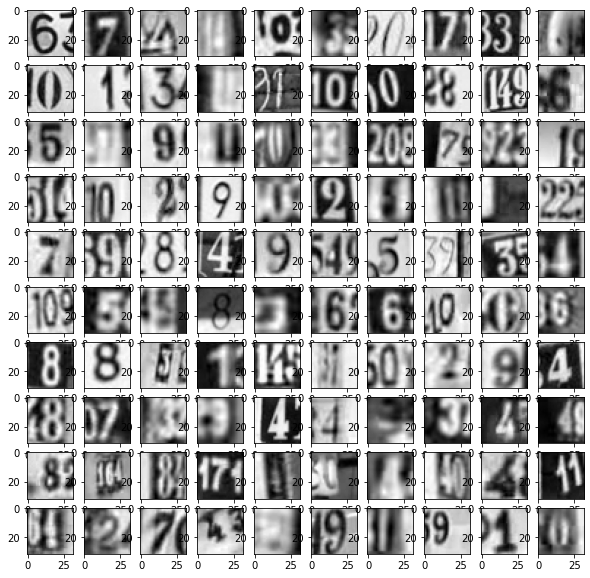

In [ ]:
fig=plt.figure(figsize=(10,10))
columns=10
rows=10
for i in range(1, columns*rows+1):
    img=X_train[i]
    fig.add_subplot(rows,columns,i)
    plt.imshow(img,cmap='gray')
plt.show()

**Visualise first 100 images from X_Test**

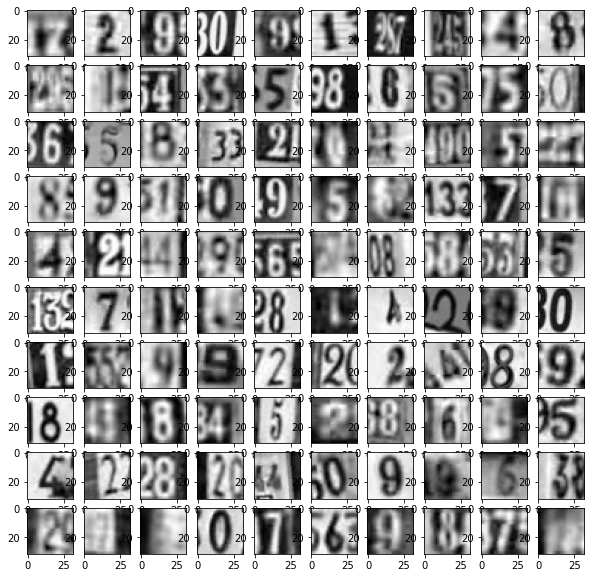

In [ ]:
fig=plt.figure(figsize=(10,10))
columns=10
rows=10
for i in range(1, columns*rows+1):
    img=X_test[i]
    fig.add_subplot(rows,columns,i)
    plt.imshow(img,cmap='gray')
plt.show()

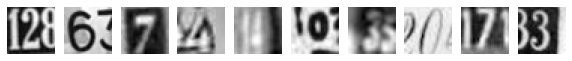

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [ ]:
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(32,32),cmap='gray')
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

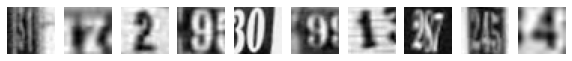

label for each of the above image: [1 7 2 9 0 9 1 8 4 4]


In [ ]:
# visualizing the first 10 images in the Test dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_test[i].reshape(32,32),cmap='gray')
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_test[0:10]))

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Data Preprocessing

In [ ]:
#Reshape data from 2D to 1D -> 32X32 to 1024
X_train = np.asarray(X_train).reshape(42000,1024)
X_test = np.asarray(X_test).reshape(18000,1024)
X_val = np.asarray(X_val).reshape(60000,1024)

In [ ]:
# converting y data into categorical (one-hot encoding)
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)
y_val = keras.utils.to_categorical(y_val, num_classes=10)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Implementing Artificial Nueral Network
    
#Basic NN

In [ ]:
##Initialize the Artificial Neural Network Classifier
keras_model = Sequential()

In [ ]:
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model.add(Dense(512,input_shape = (1024, )))
#Adding Activation function
keras_model.add(Activation('relu'))

#Hidden Layer 1
#Adding first Hidden layer
keras_model.add(Dense(256))
#Adding Activation function
keras_model.add(Activation('relu'))


#Hidden Layer 2
#Adding second Hidden layer
keras_model.add(Dense(128))
#Adding Activation function
keras_model.add(Activation('relu'))

#Hidden Layer 3
#Adding third Hidden layer
keras_model.add(Dense(64))
#Adding Activation function
keras_model.add(Activation('relu'))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model.add(Dense(32))
#Adding Activation function
keras_model.add(Activation('relu'))

# Output Layer
#Adding output layer which is of 10 nodes (digits)
keras_model.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model.add(Activation('softmax'))

In [ ]:
keras_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               524800    
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8

In [ ]:
# compiling the ANN classifier
keras_model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fitting the ANN to the Training data
history = keras_model.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 10, verbose = 1)

Epoch 1/10
210/210 [==============================] - 7s 30ms/step - loss: nan - accuracy: 0.1001 - val_loss: nan - val_accuracy: 0.1000
Epoch 2/10
210/210 [==============================] - 6s 29ms/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1000
Epoch 3/10
210/210 [==============================] - 6s 29ms/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1000
Epoch 4/10
210/210 [==============================] - 6s 29ms/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1000
Epoch 5/10
210/210 [==============================] - 6s 29ms/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1000
Epoch 6/10
210/210 [==============================] - 6s 29ms/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1000
Epoch 7/10
210/210 [==============================] - 6s 29ms/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1000
Epoch 8/10
210/210 [=====================

# observation : 

**we getting loss nan, thre are different methods to resolve this issue.**

- Change Activation function

- BatchNormalization

# Tanh Activation function
**Replace relu with tanh/sigmoid**

In [ ]:
##Initialize the Artificial Neural Network Classifier
keras_model_1 = Sequential()

In [ ]:
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model_1.add(Dense(512,input_shape = (1024, )))
#Adding Activation function
keras_model_1.add(Activation('tanh'))

#Hidden Layer 1
#Adding first Hidden layer
keras_model_1.add(Dense(256))
#Adding Activation function
keras_model_1.add(Activation('tanh'))


#Hidden Layer 2
#Adding second Hidden layer
keras_model_1.add(Dense(128))
#Adding Activation function
keras_model_1.add(Activation('tanh'))

#Hidden Layer 3
#Adding third Hidden layer
keras_model_1.add(Dense(64))
#Adding Activation function
keras_model_1.add(Activation('tanh'))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model_1.add(Dense(32))
#Adding Activation function
keras_model_1.add(Activation('tanh'))

# Output Layer
#Adding output layer which is of 10 nodes (digits)
keras_model_1.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_1.add(Activation('softmax'))

In [ ]:
keras_model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               524800    
_________________________________________________________________
activation_6 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_7 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
activation_8 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)               

In [ ]:
# compiling the ANN classifier
keras_model_1.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fitting the ANN to the Training data
history = keras_model_1.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 10, verbose = 1)

Epoch 1/10
210/210 [==============================] - 7s 30ms/step - loss: 2.2956 - accuracy: 0.1213 - val_loss: 2.2775 - val_accuracy: 0.1421
Epoch 2/10
210/210 [==============================] - 6s 29ms/step - loss: 2.2807 - accuracy: 0.1347 - val_loss: 2.2873 - val_accuracy: 0.1174
Epoch 3/10
210/210 [==============================] - 6s 29ms/step - loss: 2.2748 - accuracy: 0.1397 - val_loss: 2.2826 - val_accuracy: 0.1462
Epoch 4/10
210/210 [==============================] - 6s 29ms/step - loss: 2.2719 - accuracy: 0.1435 - val_loss: 2.2642 - val_accuracy: 0.1407
Epoch 5/10
210/210 [==============================] - 6s 29ms/step - loss: 2.2782 - accuracy: 0.1348 - val_loss: 2.2671 - val_accuracy: 0.1441
Epoch 6/10
210/210 [==============================] - 6s 29ms/step - loss: 2.2750 - accuracy: 0.1356 - val_loss: 2.2749 - val_accuracy: 0.1356
Epoch 7/10
210/210 [==============================] - 6s 30ms/step - loss: 2.2753 - accuracy: 0.1331 - val_loss: 2.2922 - val_accuracy: 0.1283

Observation : 

We are able to remove nan but accuracy is very low. 

Relu is better option than tanh. Lets do batch normalization by keeping relu activation function


In [ ]:
results = keras_model_1.evaluate(X_val, y_val)
print('Val_acc using simple NN SGD : ', results[1])

1875/1875 [==============================] - 8s 4ms/step - loss: 2.2885 - accuracy: 0.1178
Val_acc using simple NN SGD :  0.1177833303809166


In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
results_on_val = pd.DataFrame({'Method':['Basic_NN'], 'accuracy': results[1], 'loss': results[0]},index={'1'})
results_on_val = results_on_val[['Method', 'accuracy', 'loss']]
results_on_val

,Method,accuracy,loss
1,Basic_NN,0.117783,2.288487


**Regularization :** Regularization is a technique to improve the model and allow it to converge faster. So that it overcome problems of overfitting and underfitting.

In Neural network there are different ways to regularize the models.

Early stop, batch normalization, dropout normalization etc.

**Batch Normalization :**

The activation values  which are Output from first hidden layer are normalized in batches before feeding into second hidden layer.  



In [ ]:
##Initialize the Artificial Neural Network Classifier
keras_model_2 = Sequential()

In [ ]:
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model_2.add(Dense(512,input_shape = (1024, )))
keras_model_2.add(BatchNormalization())
#Adding Activation function
keras_model_2.add(Activation('relu'))

#Hidden Layer 1
#Adding first Hidden layer
keras_model_2.add(Dense(256))
keras_model_2.add(BatchNormalization())
#Adding Activation function
keras_model_2.add(Activation('relu'))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_2.add(Dense(128))
keras_model_2.add(BatchNormalization())
#Adding Activation function
keras_model_2.add(Activation('relu'))


#Hidden Layer 3
#Adding third Hidden layer
keras_model_2.add(Dense(64))
keras_model_2.add(BatchNormalization())
#Adding Activation function
keras_model_2.add(Activation('relu'))


#Hidden Layer 4
#Adding fourth Hidden layer
keras_model_2.add(Dense(32))
keras_model_2.add(BatchNormalization())
#Adding Activation function
keras_model_2.add(Activation('relu'))


# Output Layer
#Adding output layer which is of 10 nodes (digits)
keras_model_2.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_2.add(Activation('softmax'))

In [ ]:
keras_model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
activation_12 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
activation_13 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)              

In [ ]:
#compiling the ANN classifier

keras_model_2.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fitting the ANN to the Training data
history = keras_model_2.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 10, verbose = 1)

Epoch 1/10
210/210 [==============================] - 9s 35ms/step - loss: 2.2299 - accuracy: 0.2100 - val_loss: 2.1001 - val_accuracy: 0.2592
Epoch 2/10
210/210 [==============================] - 7s 33ms/step - loss: 1.7852 - accuracy: 0.4051 - val_loss: 1.7450 - val_accuracy: 0.4191
Epoch 3/10
210/210 [==============================] - 7s 33ms/step - loss: 1.5139 - accuracy: 0.5276 - val_loss: 1.4879 - val_accuracy: 0.5298
Epoch 4/10
210/210 [==============================] - 7s 33ms/step - loss: 1.2987 - accuracy: 0.6117 - val_loss: 1.3094 - val_accuracy: 0.6031
Epoch 5/10
210/210 [==============================] - 7s 33ms/step - loss: 1.1299 - accuracy: 0.6679 - val_loss: 1.1797 - val_accuracy: 0.6390
Epoch 6/10
210/210 [==============================] - 7s 33ms/step - loss: 1.0035 - accuracy: 0.7022 - val_loss: 1.1570 - val_accuracy: 0.6344
Epoch 7/10
210/210 [==============================] - 7s 33ms/step - loss: 0.9140 - accuracy: 0.7268 - val_loss: 1.0036 - val_accuracy: 0.6920

Observation : 

    - We are able to remove nan and also improved the accuracy from 10% to 77.7%.

In [ ]:
results_2 = keras_model_2.evaluate(X_val, y_val)
print('Val_acc using batchnormalization adam : ', results_2[1])

1875/1875 [==============================] - 9s 5ms/step - loss: 0.8695 - accuracy: 0.7305
Val_acc using batchnormalization adam :  0.7305166721343994


In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
results_Batch_on_val = pd.DataFrame({'Method':['Batch_Norm'], 'accuracy': results_2[1], 'loss': results_2[0]},index={'2'})
results_on_val= pd.concat([results_on_val, results_Batch_on_val])
results_on_val = results_on_val[['Method', 'accuracy', 'loss']]
results_on_val

,Method,accuracy,loss
1,Basic_NN,0.117783,2.288487
2,Batch_Norm,0.730517,0.869462


### Weight Initialization

Changing weight initialization scheme can significantly improve training of the model by preventing vanishing gradient problem up to some degree

Ref: https://keras.io/initializers/

In [ ]:
##Initialize the Artificial Neural Network Classifier
keras_model_3 = Sequential()

In [ ]:
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model_3.add(Dense(512,kernel_initializer='he_normal',input_shape = (1024, )))
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))

#Hidden Layer 1
#Adding first Hidden layer
keras_model_3.add(Dense(256,kernel_initializer='he_normal'))
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_3.add(Dense(128,kernel_initializer='he_normal'))
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))


#Hidden Layer 3
#Adding third Hidden layer
keras_model_3.add(Dense(64,kernel_initializer='he_normal'))
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))


#Hidden Layer 4
#Adding fourth Hidden layer
keras_model_3.add(Dense(32,kernel_initializer='he_normal'))
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))


# Output Layer
#Adding output layer which is of 10 nodes (digits)
keras_model_3.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_3.add(Activation('softmax'))

In [ ]:
keras_model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_5 (Batch (None, 512)               2048      
_________________________________________________________________
activation_18 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_6 (Batch (None, 256)               1024      
_________________________________________________________________
activation_19 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)              

In [ ]:
#compiling the ANN classifier

keras_model_3.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fitting the ANN to the Training data
history = keras_model_3.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 10, verbose = 1)

Epoch 1/10
210/210 [==============================] - 9s 35ms/step - loss: 2.2417 - accuracy: 0.2096 - val_loss: 2.0866 - val_accuracy: 0.2666
Epoch 2/10
210/210 [==============================] - 7s 34ms/step - loss: 1.8312 - accuracy: 0.3944 - val_loss: 1.7538 - val_accuracy: 0.4166
Epoch 3/10
210/210 [==============================] - 7s 33ms/step - loss: 1.5704 - accuracy: 0.5103 - val_loss: 1.5090 - val_accuracy: 0.5276
Epoch 4/10
210/210 [==============================] - 7s 33ms/step - loss: 1.3703 - accuracy: 0.5849 - val_loss: 1.3737 - val_accuracy: 0.5661
Epoch 5/10
210/210 [==============================] - 7s 33ms/step - loss: 1.2156 - accuracy: 0.6339 - val_loss: 1.1974 - val_accuracy: 0.6321
Epoch 6/10
210/210 [==============================] - 7s 33ms/step - loss: 1.0971 - accuracy: 0.6682 - val_loss: 1.1030 - val_accuracy: 0.6596
Epoch 7/10
210/210 [==============================] - 7s 33ms/step - loss: 1.0044 - accuracy: 0.6951 - val_loss: 1.0071 - val_accuracy: 0.6881

In [ ]:
results_3 = keras_model_3.evaluate(X_val, y_val)
print('Val_acc using batchnormalization adam : ', results_3[1])

1875/1875 [==============================] - 9s 5ms/step - loss: 0.9699 - accuracy: 0.6936
Val_acc using batchnormalization adam :  0.6935833096504211


In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
results_weight_on_val = pd.DataFrame({'Method':['Weight'], 'accuracy': results_3[1], 'loss': results_3[0]},index={'3'})
results_on_val= pd.concat([results_on_val, results_weight_on_val])
results_on_val = results_on_val[['Method', 'accuracy', 'loss']]
results_on_val

,Method,accuracy,loss
1,Basic_NN,0.117783,2.288487
2,Batch_Norm,0.730517,0.869462
3,Weight,0.693583,0.969909


### Changing optimizer from SGD to adam

In [ ]:
##Initialize the Artificial Neural Network Classifier
keras_model_4 = Sequential()

In [ ]:
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model_4.add(Dense(512,kernel_initializer='he_normal',input_shape = (1024, )))
keras_model_4.add(BatchNormalization())
#Adding Activation function
keras_model_4.add(Activation('relu'))

#Hidden Layer 1
#Adding first Hidden layer
keras_model_4.add(Dense(256,kernel_initializer='he_normal'))
keras_model_4.add(BatchNormalization())
#Adding Activation function
keras_model_4.add(Activation('relu'))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_4.add(Dense(128,kernel_initializer='he_normal'))
keras_model_4.add(BatchNormalization())
#Adding Activation function
keras_model_4.add(Activation('relu'))


#Hidden Layer 3
#Adding third Hidden layer
keras_model_4.add(Dense(64,kernel_initializer='he_normal'))
keras_model_4.add(BatchNormalization())
#Adding Activation function
keras_model_4.add(Activation('relu'))


#Hidden Layer 4
#Adding fourth Hidden layer
keras_model_4.add(Dense(32,kernel_initializer='he_normal'))
keras_model_4.add(BatchNormalization())
#Adding Activation function
keras_model_4.add(Activation('relu'))


# Output Layer
#Adding output layer which is of 10 nodes (digits)
keras_model_4.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_4.add(Activation('softmax'))

In [ ]:
keras_model_4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_10 (Batc (None, 512)               2048      
_________________________________________________________________
activation_24 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_11 (Batc (None, 256)               1024      
_________________________________________________________________
activation_25 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 128)              

In [ ]:
#compiling the ANN classifier

keras_model_4.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fitting the ANN to the Training data
history = keras_model_4.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 100, epochs = 10, verbose = 1)

Epoch 1/10
420/420 [==============================] - 11s 23ms/step - loss: 1.4611 - accuracy: 0.5160 - val_loss: 2.3004 - val_accuracy: 0.2389
Epoch 2/10
420/420 [==============================] - 9s 22ms/step - loss: 0.9559 - accuracy: 0.6977 - val_loss: 1.4400 - val_accuracy: 0.5230
Epoch 3/10
420/420 [==============================] - 9s 22ms/step - loss: 0.7984 - accuracy: 0.7463 - val_loss: 1.6174 - val_accuracy: 0.4814
Epoch 4/10
420/420 [==============================] - 9s 21ms/step - loss: 0.7094 - accuracy: 0.7764 - val_loss: 1.2161 - val_accuracy: 0.5957
Epoch 5/10
420/420 [==============================] - 9s 22ms/step - loss: 0.6374 - accuracy: 0.7987 - val_loss: 1.3824 - val_accuracy: 0.5563
Epoch 6/10
420/420 [==============================] - 9s 22ms/step - loss: 0.5993 - accuracy: 0.8101 - val_loss: 1.0141 - val_accuracy: 0.6724
Epoch 7/10
420/420 [==============================] - 9s 22ms/step - loss: 0.5523 - accuracy: 0.8265 - val_loss: 0.9881 - val_accuracy: 0.679

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


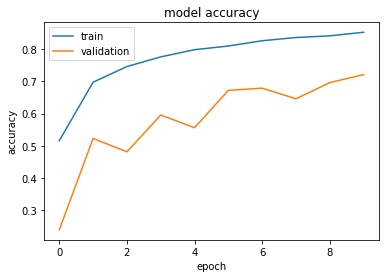

In [ ]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Observation : 
    
 After changing the optimizer from SGD to adam,
 
 - we are able to improve the training accuracy to 89%, but validation accuracy is just 74.68% which results in overfitting


In [ ]:
results_4 = keras_model_4.evaluate(X_val, y_val)
print('Val_acc using batchnormalization adam : ', results_4[1])

1875/1875 [==============================] - 9s 5ms/step - loss: 0.8494 - accuracy: 0.7213
Val_acc using batchnormalization adam :  0.7213000059127808


In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
results_adam_on_val = pd.DataFrame({'Method':['adam'], 'accuracy': results_4[1], 'loss': results_4[0]},index={'4'})
results_on_val= pd.concat([results_on_val, results_adam_on_val])
results_on_val = results_on_val[['Method', 'accuracy', 'loss']]
results_on_val

,Method,accuracy,loss
1,Basic_NN,0.117783,2.288487
2,Batch_Norm,0.730517,0.869462
3,Weight,0.693583,0.969909
4,adam,0.721300,0.849406


# Reduce overfitting problem

- we can observe that batch size is too large and epochs are less. 

- lets reduce the batch size from 100 to 30 and epochs from 10 to 100 and callback earlystopping to avoid further overfitting 

In [ ]:
##Initialize the Artificial Neural Network Classifier
keras_model_5 = Sequential()

In [ ]:
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model_5.add(Dense(512,kernel_initializer='he_normal',input_shape = (1024, )))
keras_model_5.add(BatchNormalization())
#Adding Activation function
keras_model_5.add(Activation('relu'))

#Hidden Layer 1
#Adding first Hidden layer
keras_model_5.add(Dense(256,kernel_initializer='he_normal'))
keras_model_5.add(BatchNormalization())
#Adding Activation function
keras_model_5.add(Activation('relu'))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_5.add(Dense(128,kernel_initializer='he_normal'))
keras_model_5.add(BatchNormalization())
#Adding Activation function
keras_model_5.add(Activation('relu'))


#Hidden Layer 3
#Adding third Hidden layer
keras_model_5.add(Dense(64,kernel_initializer='he_normal'))
keras_model_5.add(BatchNormalization())
#Adding Activation function
keras_model_5.add(Activation('relu'))


#Hidden Layer 4
#Adding fourth Hidden layer
keras_model_5.add(Dense(32,kernel_initializer='he_normal'))
keras_model_5.add(BatchNormalization())
#Adding Activation function
keras_model_5.add(Activation('relu'))


# Output Layer
#Adding output layer which is of 10 nodes (digits)
keras_model_5.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_5.add(Activation('softmax'))

In [ ]:
keras_model_5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_15 (Batc (None, 512)               2048      
_________________________________________________________________
activation_30 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_16 (Batc (None, 256)               1024      
_________________________________________________________________
activation_31 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 128)              

In [ ]:
#compiling the ANN classifier

keras_model_5.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fitting the ANN to the Training data
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)
history_2 = keras_model_5.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 30, epochs = 100, verbose = 1,callbacks=[es])

Epoch 1/100
1400/1400 [==============================] - 20s 13ms/step - loss: 1.4814 - accuracy: 0.5083 - val_loss: 1.5205 - val_accuracy: 0.4901
Epoch 2/100
1400/1400 [==============================] - 23s 17ms/step - loss: 1.0627 - accuracy: 0.6594 - val_loss: 1.5295 - val_accuracy: 0.5288
Epoch 3/100
1400/1400 [==============================] - 19s 13ms/step - loss: 0.9332 - accuracy: 0.7030 - val_loss: 1.3114 - val_accuracy: 0.5959
Epoch 4/100
1400/1400 [==============================] - 19s 13ms/step - loss: 0.8497 - accuracy: 0.7312 - val_loss: 1.0438 - val_accuracy: 0.6618
Epoch 5/100
1400/1400 [==============================] - 23s 17ms/step - loss: 0.7801 - accuracy: 0.7527 - val_loss: 1.0331 - val_accuracy: 0.6632
Epoch 6/100
1400/1400 [==============================] - 19s 14ms/step - loss: 0.7262 - accuracy: 0.7690 - val_loss: 0.9681 - val_accuracy: 0.6915
Epoch 7/100
1400/1400 [==============================] - 19s 14ms/step - loss: 0.6907 - accuracy: 0.7809 - val_loss: 0

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


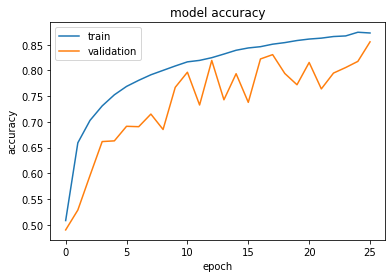

In [ ]:
print(history_2.history.keys())
# "Loss"
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Observation : 
    
- We are able to reduce the overfitting problem. 

- But still we are seeing more fluctuation in the validation accuracy.

In [ ]:
results_5 = keras_model_5.evaluate(X_val, y_val)
print('Val_acc using batchnormalization adam : ', results_5[1])

1875/1875 [==============================] - 9s 5ms/step - loss: 0.4660 - accuracy: 0.8557
Val_acc using batchnormalization adam :  0.8556666374206543


In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
results_adam_on_val = pd.DataFrame({'Method':['adam_batchsize'], 'accuracy': results_5[1], 'loss': results_5[0]},index={'5'})
results_on_val= pd.concat([results_on_val, results_adam_on_val])
results_on_val = results_on_val[['Method', 'accuracy', 'loss']]
results_on_val

,Method,accuracy,loss
1,Basic_NN,0.117783,2.288487
2,Batch_Norm,0.730517,0.869462
3,Weight,0.693583,0.969909
4,adam,0.721300,0.849406
5,adam_batchsize,0.855667,0.465963


# Adding dropout may reduce the fluctuation in validation accuracy and may bring close to training accuracy 

In [ ]:
##Initialize the Artificial Neural Network Classifier
keras_model_6 = Sequential()

In [ ]:
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model_6.add(Dense(512,kernel_initializer='he_normal',input_shape = (1024, )))
keras_model_6.add(BatchNormalization())
#Adding Activation function
keras_model_6.add(Activation('relu'))
keras_model_6.add(Dropout(0.2))

#Hidden Layer 1
#Adding first Hidden layer
keras_model_6.add(Dense(256,kernel_initializer='he_normal'))
keras_model_6.add(BatchNormalization())
#Adding Activation function
keras_model_6.add(Activation('relu'))
keras_model_6.add(Dropout(0.2))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_6.add(Dense(128,kernel_initializer='he_normal'))
keras_model_6.add(BatchNormalization())
#Adding Activation function
keras_model_6.add(Activation('relu'))
keras_model_6.add(Dropout(0.2))


#Hidden Layer 3
#Adding third Hidden layer
keras_model_6.add(Dense(64,kernel_initializer='he_normal'))
keras_model_6.add(BatchNormalization())
#Adding Activation function
keras_model_6.add(Activation('relu'))
keras_model_6.add(Dropout(0.2))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model_6.add(Dense(32,kernel_initializer='he_normal'))
keras_model_6.add(BatchNormalization())
#Adding Activation function
keras_model_6.add(Activation('relu'))
keras_model_6.add(Dropout(0.2))

# Output Layer
#Adding output layer which is of 10 nodes (digits)
keras_model_6.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_6.add(Activation('softmax'))

In [ ]:
keras_model_6.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_20 (Batc (None, 512)               2048      
_________________________________________________________________
activation_36 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_21 (Batc (None, 256)               1024      
_________________________________________________________________
activation_37 (Activation)   (None, 256)              

In [ ]:
#compiling the ANN classifier

keras_model_6.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fitting the ANN to the Training data
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)
history_3 = keras_model_6.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 30, epochs = 100, verbose = 1,callbacks=[es])

Epoch 1/100
1400/1400 [==============================] - 25s 17ms/step - loss: 2.0291 - accuracy: 0.2717 - val_loss: 1.5871 - val_accuracy: 0.4657
Epoch 2/100
1400/1400 [==============================] - 19s 14ms/step - loss: 1.5179 - accuracy: 0.4919 - val_loss: 1.4085 - val_accuracy: 0.5368
Epoch 3/100
1400/1400 [==============================] - 19s 14ms/step - loss: 1.3172 - accuracy: 0.5786 - val_loss: 1.1182 - val_accuracy: 0.6552
Epoch 4/100
1400/1400 [==============================] - 20s 14ms/step - loss: 1.1973 - accuracy: 0.6252 - val_loss: 1.5952 - val_accuracy: 0.4871
Epoch 5/100
1400/1400 [==============================] - 19s 14ms/step - loss: 1.1060 - accuracy: 0.6609 - val_loss: 1.0226 - val_accuracy: 0.6779
Epoch 6/100
1400/1400 [==============================] - 20s 14ms/step - loss: 1.0401 - accuracy: 0.6783 - val_loss: 0.9715 - val_accuracy: 0.6916
Epoch 7/100
1400/1400 [==============================] - 19s 14ms/step - loss: 1.0007 - accuracy: 0.6938 - val_loss: 1

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


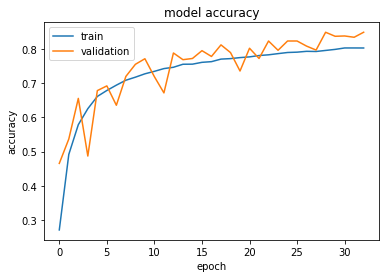

In [ ]:
print(history_3.history.keys())
# "Loss"
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Observation :**

- We are able to reduce the fluctuation in the accuracy by adding dropout. But overall accuracy is reduced. 

- Train and validation accuracy are almost same 

In [ ]:
results_6 = keras_model_6.evaluate(X_val, y_val)
print('Val_acc using batchnormalization adam : ', results_6[1])

1875/1875 [==============================] - 9s 5ms/step - loss: 0.4955 - accuracy: 0.8481
Val_acc using batchnormalization adam :  0.8481000065803528


In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
results_adam_on_val = pd.DataFrame({'Method':['adam_batchsize_dropout'], 'accuracy': results_6[1], 'loss': results_6[0]},index={'6'})
results_on_val= pd.concat([results_on_val, results_adam_on_val])
results_on_val = results_on_val[['Method', 'accuracy', 'loss']]
results_on_val

,Method,accuracy,loss
1,Basic_NN,0.117783,2.288487
2,Batch_Norm,0.730517,0.869462
3,Weight,0.693583,0.969909
4,adam,0.721300,0.849406
5,adam_batchsize,0.855667,0.465963
6,adam_batchsize_dropout,0.848100,0.495468


# we can improve the accuracy by reducing the learning rate to 0.0001

In [ ]:
##Initialize the Artificial Neural Network Classifier
keras_model_7 = Sequential()

In [ ]:
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model_7.add(Dense(512,kernel_initializer='he_normal',input_shape = (1024, )))
keras_model_7.add(BatchNormalization())
#Adding Activation function
keras_model_7.add(Activation('relu'))
keras_model_7.add(Dropout(0.2))

#Hidden Layer 1
#Adding first Hidden layer
keras_model_7.add(Dense(256,kernel_initializer='he_normal'))
keras_model_7.add(BatchNormalization())
#Adding Activation function
keras_model_7.add(Activation('relu'))
keras_model_7.add(Dropout(0.2))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_7.add(Dense(128,kernel_initializer='he_normal'))
keras_model_7.add(BatchNormalization())
#Adding Activation function
keras_model_7.add(Activation('relu'))
keras_model_7.add(Dropout(0.2))


#Hidden Layer 3
#Adding third Hidden layer
keras_model_7.add(Dense(64,kernel_initializer='he_normal'))
keras_model_7.add(BatchNormalization())
#Adding Activation function
keras_model_7.add(Activation('relu'))
keras_model_7.add(Dropout(0.2))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model_7.add(Dense(32,kernel_initializer='he_normal'))
keras_model_7.add(BatchNormalization())
#Adding Activation function
keras_model_7.add(Activation('relu'))
keras_model_7.add(Dropout(0.2))

# Output Layer
#Adding output layer which is of 10 nodes (digits)
keras_model_7.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_7.add(Activation('softmax'))

In [ ]:
keras_model_7.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_25 (Batc (None, 512)               2048      
_________________________________________________________________
activation_42 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_26 (Batc (None, 256)               1024      
_________________________________________________________________
activation_43 (Activation)   (None, 256)              

# Learning rate reduced to 0.0001

In [ ]:
#compiling the ANN classifier
# Learning rate reduced to 0.0001
from keras.optimizers import adam_v2
Adam_lr =  adam_v2.Adam(learning_rate=0.0001)

keras_model_7.compile(optimizer = Adam_lr, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fitting the ANN to the Training data
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
history_4 = keras_model_7.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 30, epochs = 100, verbose = 1,callbacks=[es])

Epoch 1/100
1400/1400 [==============================] - 21s 14ms/step - loss: 2.2536 - accuracy: 0.2008 - val_loss: 1.8417 - val_accuracy: 0.3969
Epoch 2/100
1400/1400 [==============================] - 19s 14ms/step - loss: 1.7223 - accuracy: 0.4273 - val_loss: 1.4575 - val_accuracy: 0.5761
Epoch 3/100
1400/1400 [==============================] - 20s 14ms/step - loss: 1.4348 - accuracy: 0.5418 - val_loss: 1.2320 - val_accuracy: 0.6246
Epoch 4/100
1400/1400 [==============================] - 19s 13ms/step - loss: 1.2747 - accuracy: 0.5966 - val_loss: 1.0893 - val_accuracy: 0.6754
Epoch 5/100
1400/1400 [==============================] - 19s 14ms/step - loss: 1.1631 - accuracy: 0.6321 - val_loss: 1.0521 - val_accuracy: 0.6818
Epoch 6/100
1400/1400 [==============================] - 19s 14ms/step - loss: 1.0886 - accuracy: 0.6584 - val_loss: 1.0453 - val_accuracy: 0.6622
Epoch 7/100
1400/1400 [==============================] - 19s 14ms/step - loss: 1.0369 - accuracy: 0.6756 - val_loss: 0

**Train Accuracy vs Validation Accuracy vs epochs**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


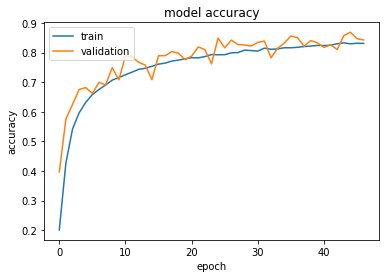

In [ ]:
print(history_4.history.keys())
# "Loss"
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Train loss vs Validation Loss vs epochs**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


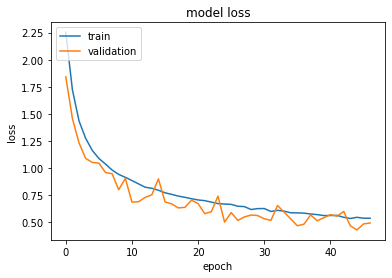

In [ ]:
print(history_4.history.keys())
# "Loss"
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Observation : 

- We can see that validation loss value is little lower than training loss.

Reason : This happens when we use Dropout, since the behaviour when training and validation are different.

When training, a percentage of the features are set to zero (20% in out case since we are using Dropout(0.2)). When validation/testing, all features are used (and are scaled appropriately). So the model at test time is more robust - and can lead to higher testing/ validation accuracies or lower testing/validation loss. 

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Evaluate Test data

In [ ]:
Test_results = keras_model_7.evaluate(X_test, y_test)

563/563 [==============================] - 3s 5ms/step - loss: 0.6100 - accuracy: 0.8079


**Observation :** 

**Overall training, validation accuracy is improved and close to each other.**

**Training accurcy (83.12%), validation accuracy(84.28%) and test accuracy (80.79%)**. 

In [ ]:
pip install -q -U keras-tuner

     |████████████████████████████████| 97 kB 3.2 MB/s 


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Hyperparamter Tunning

In [ ]:
import kerastuner as kt
from kerastuner import HyperModel


class ANNHyperModel(HyperModel):
    
    def build(self, hp):
      model = tf.keras.Sequential()
      # Tune the number of units in the first Dense layer
      # Choose an optimal value between 32-1024
      hp_units1 = hp.Int('units1', min_value=32, max_value=1024, step=32)
      hp_units2 = hp.Int('units2', min_value=32, max_value=1024, step=32)
      hp_units3 = hp.Int('units3', min_value=32, max_value=1024, step=32)
      # Input Layer
      #Adding Input layer and activation functions ReLU
      model.add(Dense(units=hp_units1,kernel_initializer='he_normal',input_shape = (1024, )))
      model.add(BatchNormalization())
      #Adding Activation function
      model.add(Activation('relu'))
      model.add(Dropout(0.2))
      
      #Hidden Layer 1
      #Adding first Hidden layer
      model.add(Dense(units=hp_units2,kernel_initializer='he_normal'))
      model.add(BatchNormalization())
      #Adding Activation function
      model.add(Activation('relu'))
      model.add(Dropout(0.2))
      
      #Hidden Layer 2
      #Adding second Hidden layer
      model.add(Dense(units=hp_units3,kernel_initializer='he_normal'))
      model.add(BatchNormalization())
      #Adding Activation function
      model.add(Activation('relu'))
      model.add(Dropout(0.2))
      
    
     # Output Layer
     #Adding output layer which is of 10 nodes (digits)
      model.add(Dense(10))

      # Tune the learning rate for the optimizer
      # Choose an optimal value from 0.01, 0.001, or 0.0001
      hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

      model.compile(
          optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
          loss = 'categorical_crossentropy', metrics = ['accuracy']
      )

      return model

hypermodel = ANNHyperModel()

tuner = kt.Hyperband(
    hypermodel,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='keras_tuner_dir',
    project_name='keras_tuner_demo2'
)

tuner.search(X_train, y_train, epochs=10, validation_data=(X_val,y_val))

Trial 30 Complete [00h 01m 56s]
val_accuracy: 0.10058332979679108

Best val_accuracy So Far: 0.2350333333015442
Total elapsed time: 01h 09m 14s
INFO:tensorflow:Oracle triggered exit


In [ ]:
best_model = tuner.get_best_models()[0]

In [ ]:
Test_results_1 = best_model.evaluate(X_test, y_test)

563/563 [==============================] - 3s 5ms/step - loss: 2.1560 - accuracy: 0.2302


**Hyperparamter tunning did not help in improving the model training**

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Predicting the test data using final keras_model_7

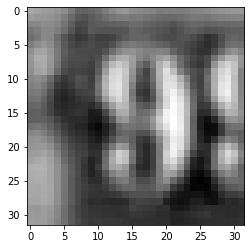

In [ ]:
#Showing the image
plt.imshow(X_test[5].reshape(32,32),cmap='gray')


In [ ]:
#Predicting the digits
#keras_model_7.predict_classes(X_test)[5]


np.argmax(keras_model_7.predict(X_test)[5], axis=-1)

9

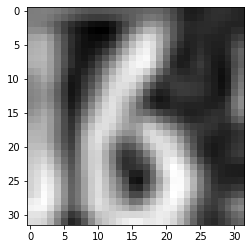

In [ ]:
#Showing the image
plt.imshow(X_test[128].reshape(32,32),cmap='gray')

In [ ]:
#Predicting the digits
#keras_model_7.predict_classes(X_test)[128]

np.argmax(keras_model_7.predict(X_test)[128], axis=-1)

6

<span style="font-family: Arial; font-weight:bold;font-size:1.75em;color:#00b3e5;">  Conclusion

- keras_model_7 is final model with **Training accurcy (82.90%), validation accuracy(84.3%) and test accuracy      
   (81.0%)**.
   
- By using the keras_model_7 we are able to predict the test data accuratly
   
Modifications done final model in comparison with basic nueral network 

- Batch normalization is done to avoid loss = nan 
- SGD optimizer is changed to adam
- Weight initializer is updated with he_normal to avoid vanishing/exploding gradient
- Batch size is reduced from 100 to 30 and epochs increased from 10 to 100 with callback earlystopping to reduce the overfitting.
- Dropout is added to reduce the number of features in training set, so that validation set acts more robust and reduce the fluctuation. 
- Learning rate is reduced to 0.0001. As the learning is slowly and accuratly so that cost function reaches to minima.

- We are able to predict the test data with 80.72% accuratly.